<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥FLOOD PREDICTION (CODE)🔥🔥 </div>

![](https://w0.peakpx.com/wallpaper/282/973/HD-wallpaper-flooded-area-beautiful-scenery.jpg)

Here are some additional notes about floods that you can include:

1. **Causes of Floods**:
   - **Natural Causes**: Heavy rainfall, snowmelt, hurricanes, and tsunamis can lead to flooding.
   - **Human Causes**: Deforestation, urbanization, poor land-use planning, and infrastructure development can exacerbate flooding by altering natural drainage systems.

2. **Types of Floods**:
   - **Riverine Floods**: Result from the overflow of rivers and streams due to heavy rainfall or snowmelt.
   - **Flash Floods**: Rapid flooding typically caused by intense rainfall in a short period or sudden dam or levee failures.
   - **Coastal Floods**: Occur when strong winds, high tides, and storm surges combine to flood coastal areas.
   - **Urban Floods**: Result from heavy rainfall overwhelming urban drainage systems, leading to waterlogging in cities.

3. **Impacts of Floods**:
   - **Loss of Lives and Property**: Floods can cause casualties and extensive damage to homes, infrastructure, and crops.
   - **Displacement**: People may be forced to evacuate their homes, leading to temporary or permanent displacement.
   - **Economic Losses**: Businesses can suffer significant financial losses due to flood damage, disrupted transportation, and loss of productivity.
   - **Environmental Damage**: Floods can harm ecosystems, leading to soil erosion, water contamination, and loss of biodiversity.

4. **Flood Mitigation and Preparedness**:
   - **Flood Control Measures**: Construction of dams, levees, and flood barriers to regulate water flow and reduce flood risk.
   - **Early Warning Systems**: Installation of sensors, gauges, and forecasting models to provide timely warnings to at-risk communities.
   - **Land-use Planning**: Proper zoning regulations and floodplain management to minimize development in flood-prone areas.
   - **Community Preparedness**: Education, drills, and evacuation plans to help communities respond effectively to floods.
   - **Climate Adaptation**: Strategies to address climate change impacts and increase resilience to extreme weather events.

5. **Global Initiatives and Organizations**:
   - **UNDRR (United Nations Office for Disaster Risk Reduction)**: Promotes disaster risk reduction strategies, including flood management, at the global level.
   - **GFDRR (Global Facility for Disaster Reduction and Recovery)**: Provides support for disaster risk reduction and recovery projects worldwide.
   - **International Red Cross and Red Crescent Movement**: Offers humanitarian assistance during and after floods, including emergency response and recovery efforts.

6. **Personal Safety Tips**:
   - **Stay Informed**: Monitor weather forecasts and flood warnings from local authorities.
   - **Prepare an Emergency Kit**: Include essential supplies like water, non-perishable food, flashlights, and first aid supplies.
   - **Have an Evacuation Plan**: Know evacuation routes and have a designated meeting point for family members.
   - **Avoid Flood Waters**: Stay away from flooded areas, as water may be contaminated and hiding dangerous debris.

These notes provide a comprehensive overview of floods, their impacts, mitigation strategies, and safety tips, which can be useful for education, disaster preparedness, and awareness campaigns.

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥IMPORTING LIBRARIES🔥🔥 </div>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind,chi2_contingency
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
import optuna
import lightgbm as lgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool, cv, MetricVisualizer
import os
import warnings
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv
/kaggle/input/xgboostsubmission2/XGBoost_Submission2.csv


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥SETTING FOR SEABORN🔥🔥 </div>

In [2]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

plt.style.use('fivethirtyeight')

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥DATSET READING)🔥🔥 </div>

In [3]:
train_data = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥TRAIN - TEST SAMPLE DATA🔥🔥 </div>

In [4]:
train_data.sample(10).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

In [5]:
test_data.sample(10).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#1565C0', 'font-weight': 'bold'})

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥STATSICAL DESCRIPTION OF TRAIN DATA🔥🔥 </div>

In [6]:
train_data.describe().style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥STATSICAL DESCRIPTION OF TEST DATA🔥🔥 </div>

In [7]:
test_data.describe().style.set_properties(**{'background-color': '#f9f9f9', 'color': '#1565C0', 'font-weight': 'bold'})

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥TRAIN DATA INFORMATION🔥🔥 </div>

In [8]:
train_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥TEST DATA INFORMATION🔥🔥 </div>

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥NULL VALUE CHECKING🔥🔥 </div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


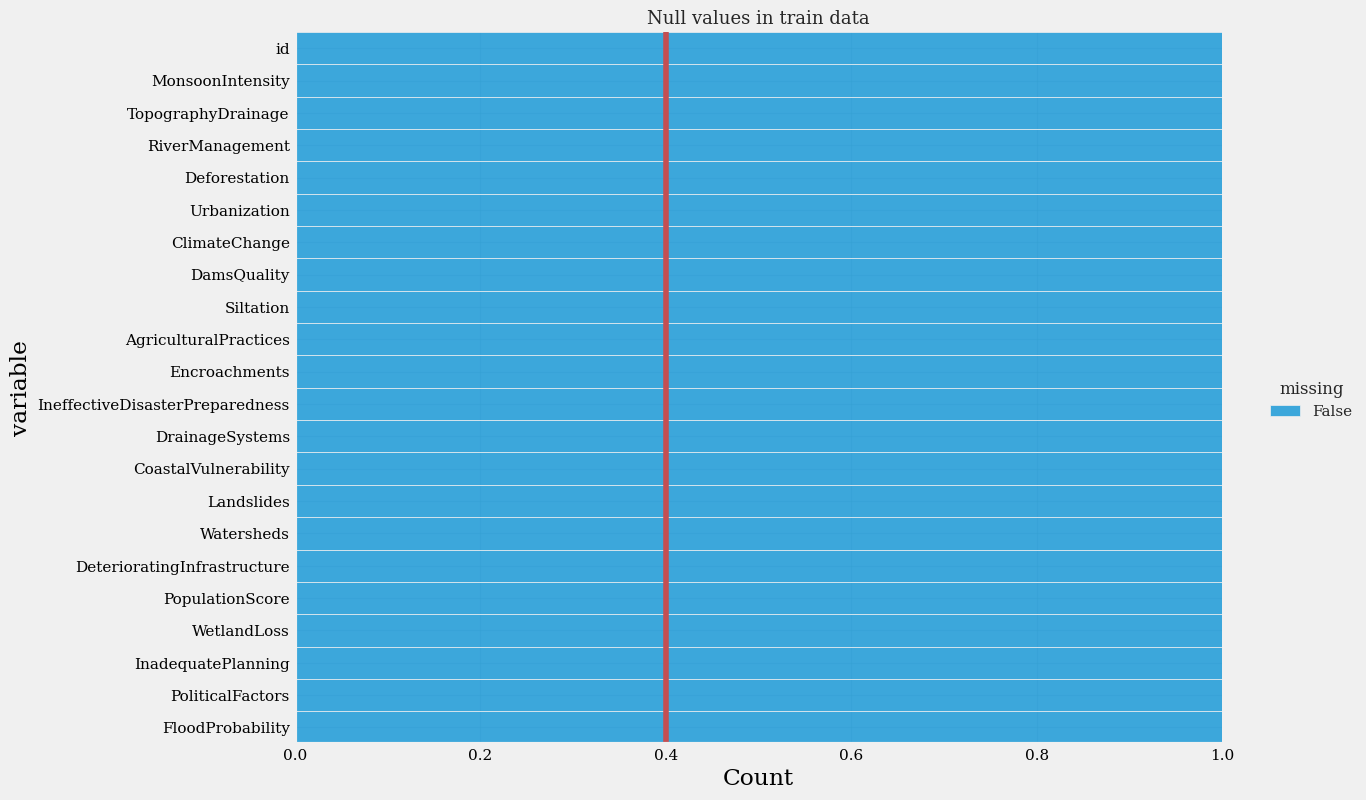

In [10]:
sns.displot(data=train_data.isnull().melt(value_name = 'missing'),
           y = 'variable',
           hue = 'missing',multiple='fill',height=8,aspect = 1.6)
plt.axvline(0.4,color = 'r')
plt.title("Null values in train data",fontsize = 13)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


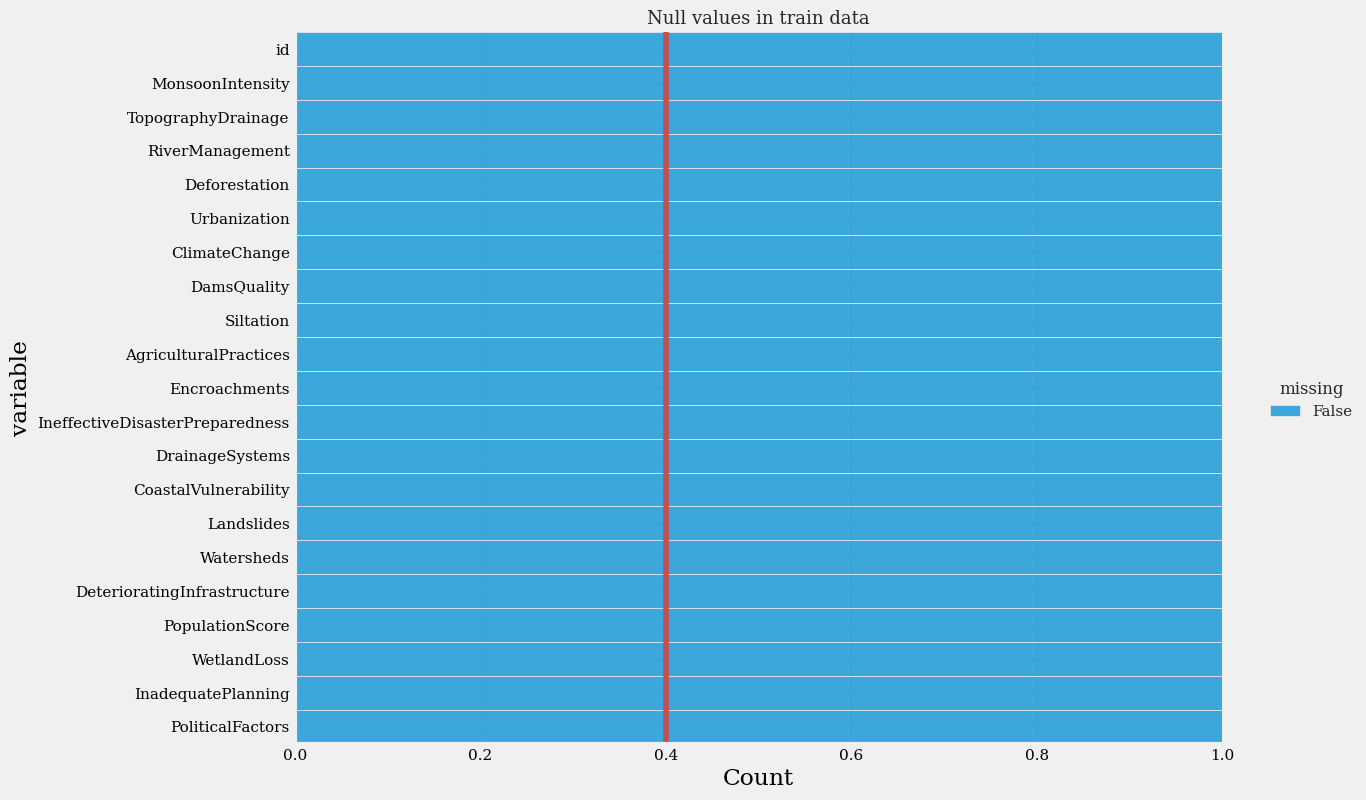

In [11]:
sns.displot(data=test_data.isnull().melt(value_name = 'missing'),
           y = 'variable',
           hue = 'missing',multiple='fill',height=8,aspect = 1.6)
plt.axvline(0.4,color = 'r')
plt.title("Null values in train data",fontsize = 13)
plt.show()

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥DATA DUPLICATE CHECKING🔥🔥 </div>

In [12]:
train_data.duplicated().sum()

0

In [13]:
train_data.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥TARGET COLUMN ANALYSIS🔥🔥 </div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


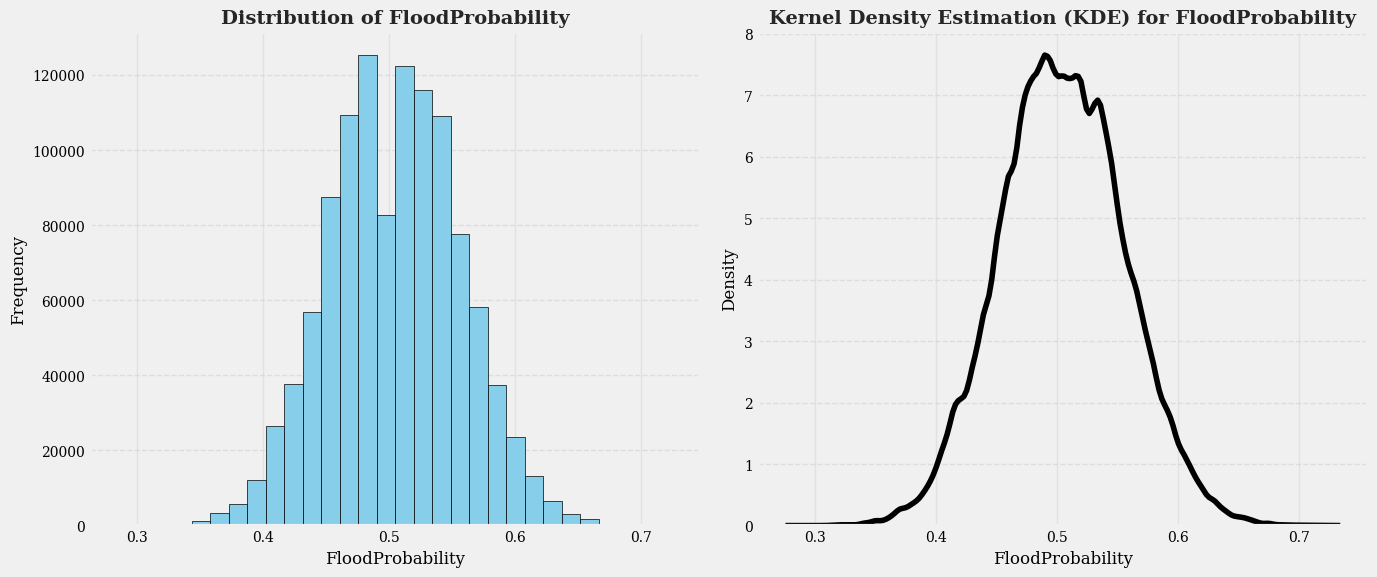

In [14]:
# Plotting
plt.figure(figsize=(14, 6))

# Plotting histogram and KDE for 'FloodProbability' column
plt.subplot(1, 2, 1)
plt.hist(train_data['FloodProbability'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of FloodProbability', fontsize=14, fontweight='bold')
plt.xlabel('FloodProbability', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Plotting KDE only for 'FloodProbability' column
plt.subplot(1, 2, 2)
sns.kdeplot(train_data['FloodProbability'], color='black')
plt.title('Kernel Density Estimation (KDE) for FloodProbability', fontsize=14, fontweight='bold')
plt.xlabel('FloodProbability', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥🔥TRANING DATA AND TESTING DATA ANALYSIS🔥🔥 </div>

In [15]:
unique_counts = train_data.nunique()
#Threshold to distinguish continous and categorical
threshold = 12
continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
#categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()
if 'id' in continuous_vars:
    continuous_vars.remove('id')


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">⚡CONTINUOUS COLUMN ANALYSIS⚡ </div>

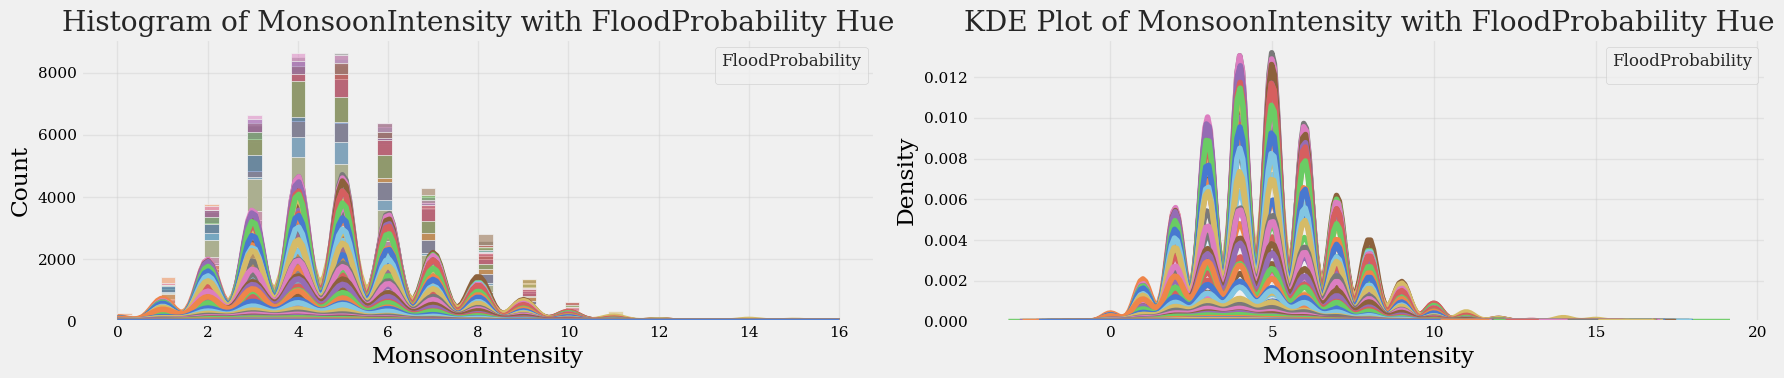

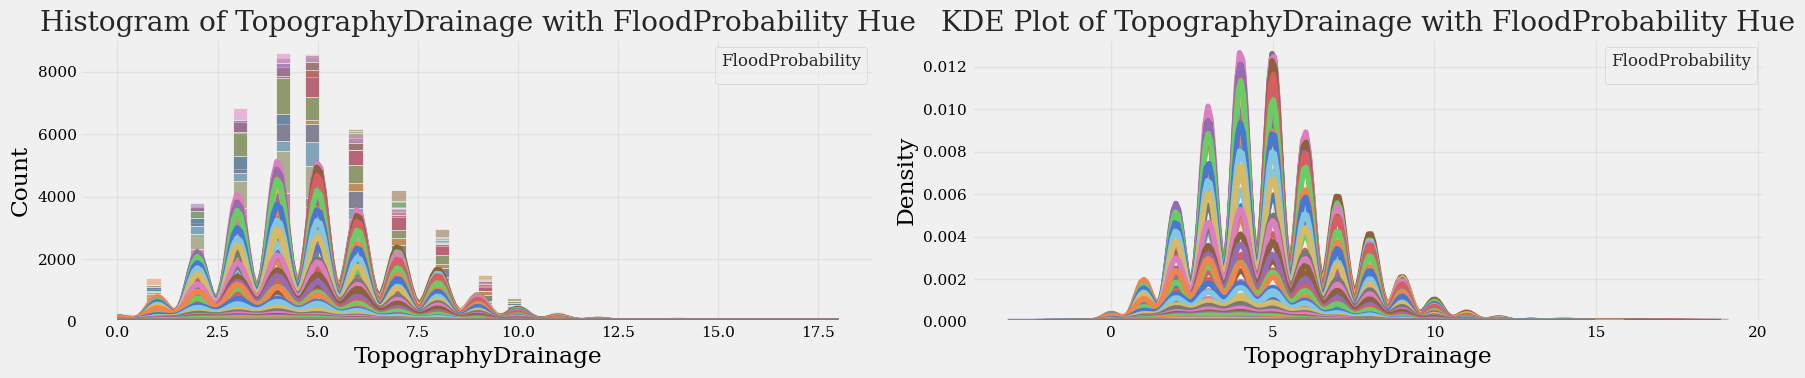

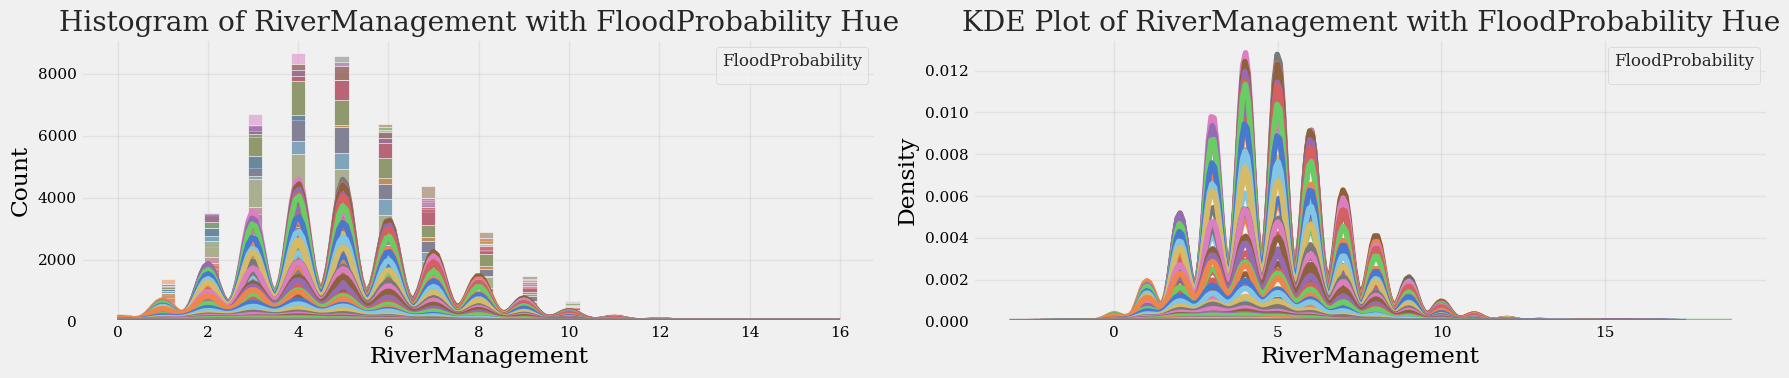

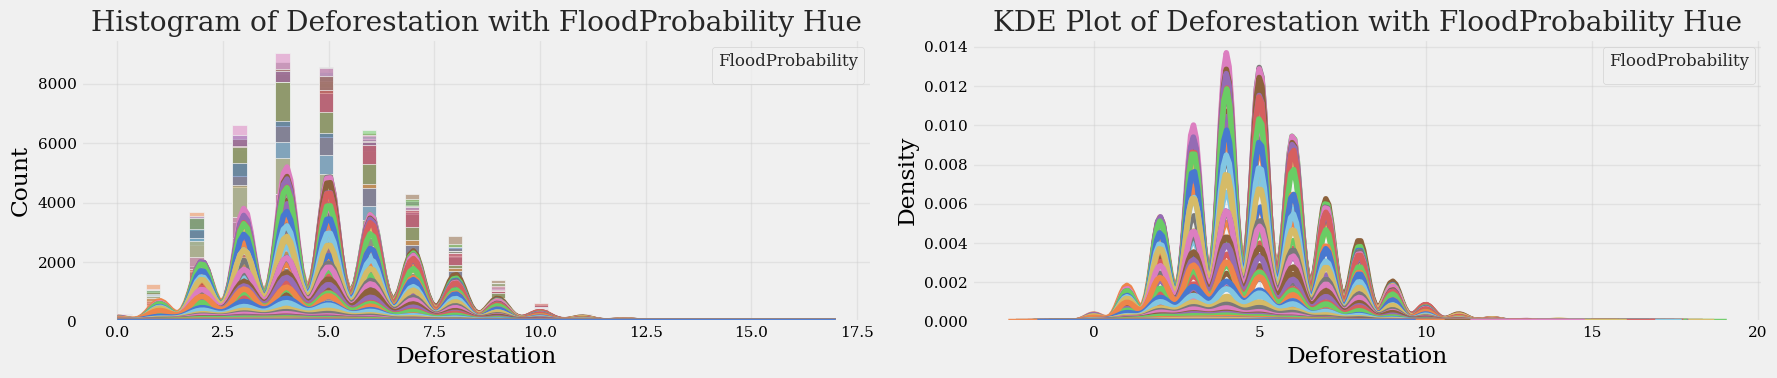

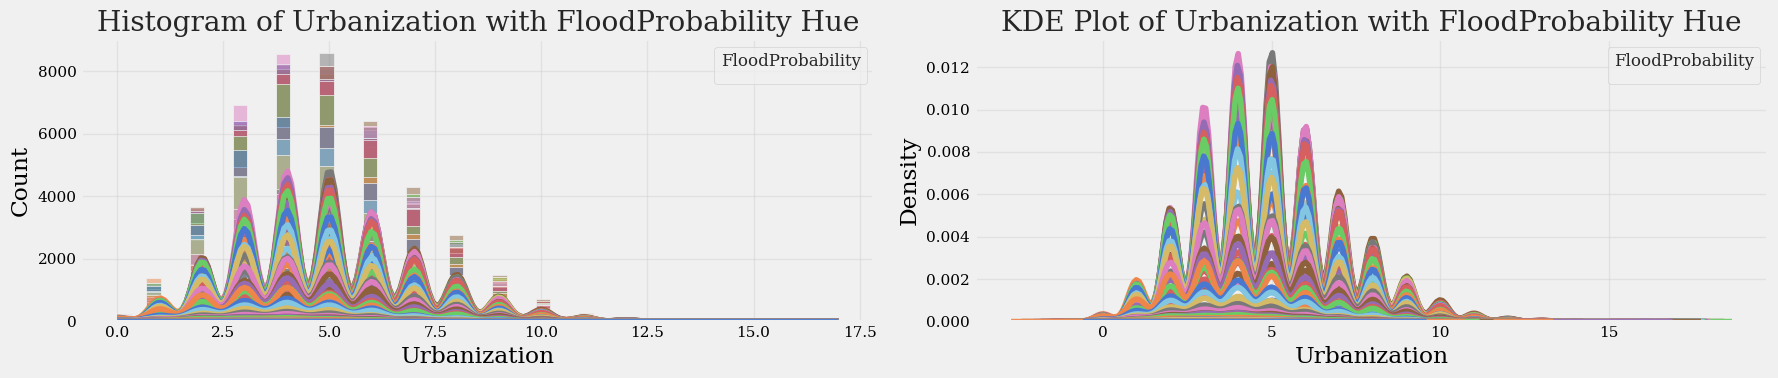

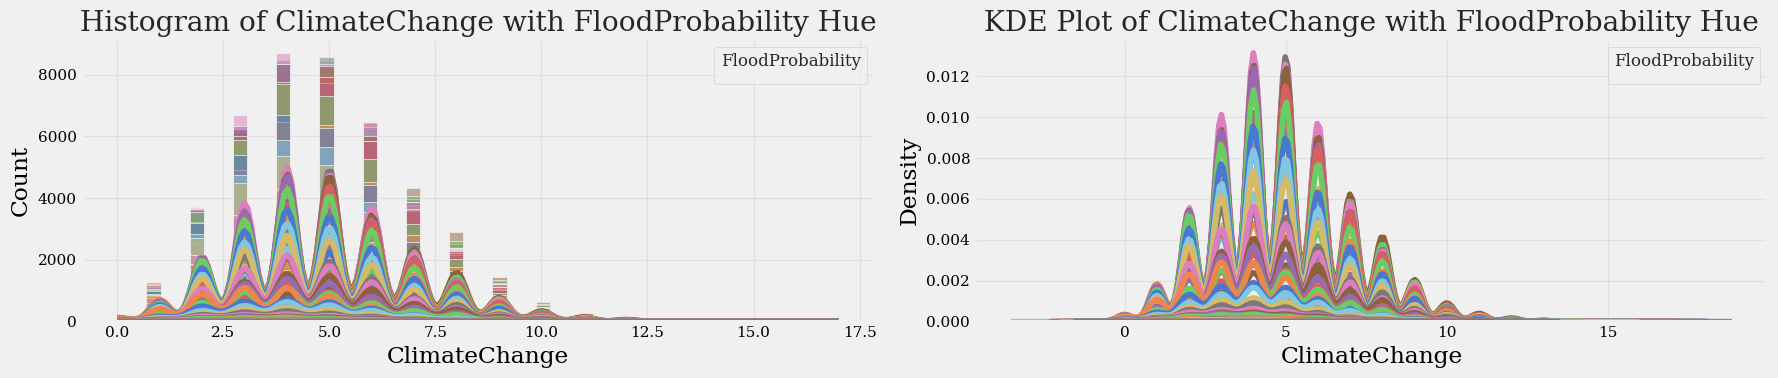

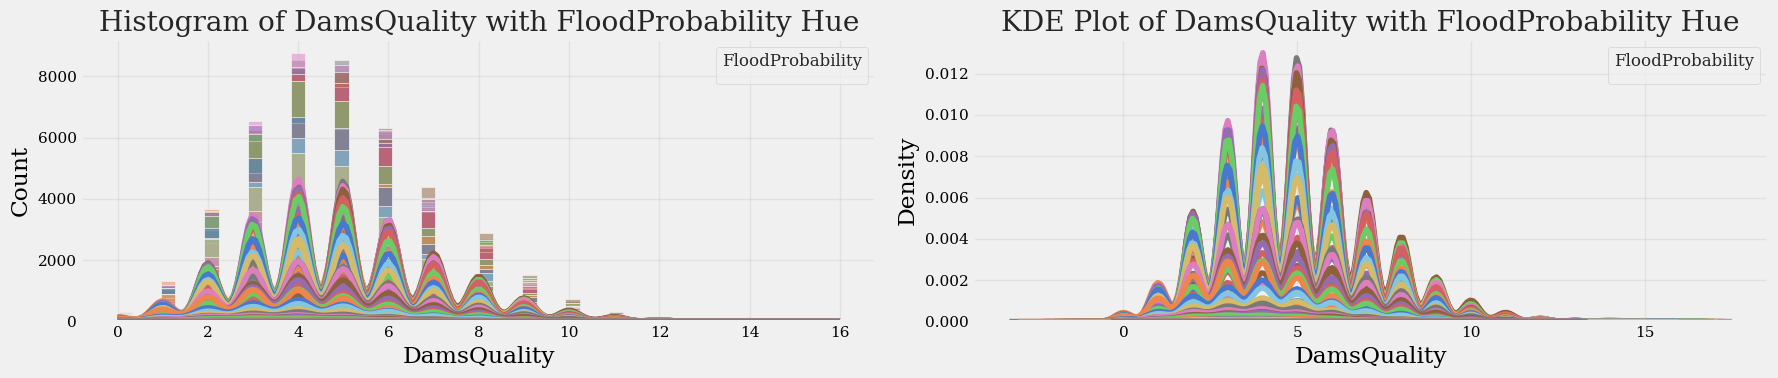

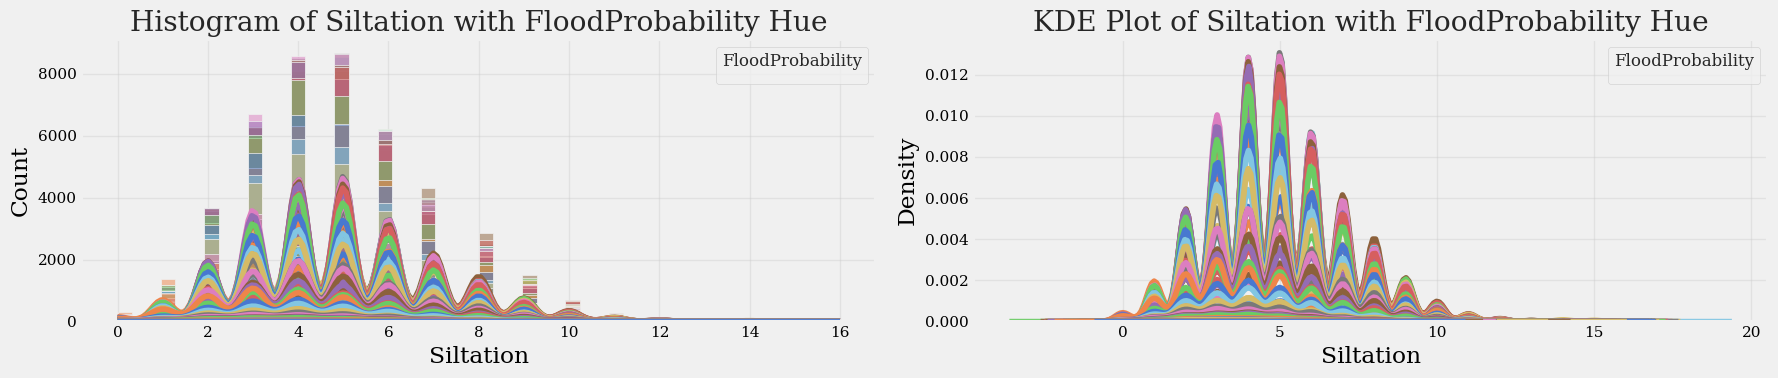

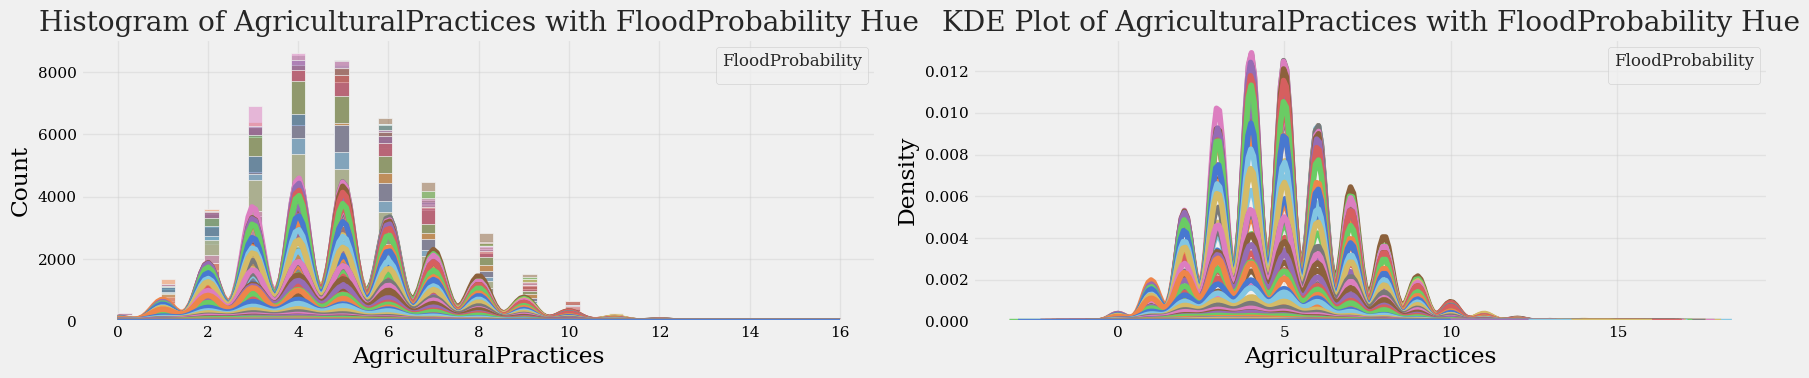

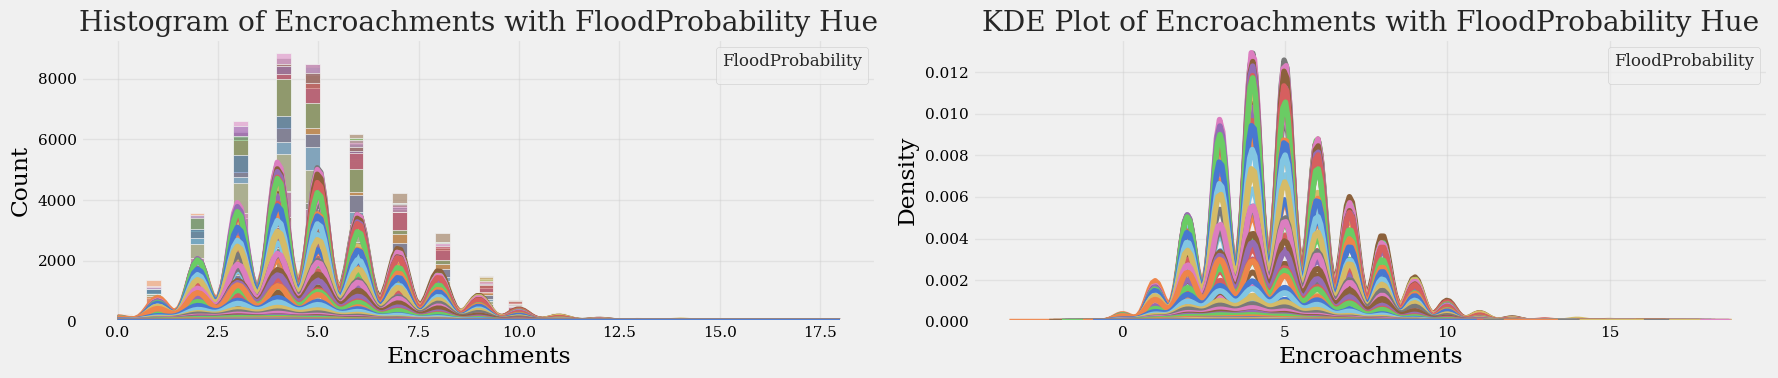

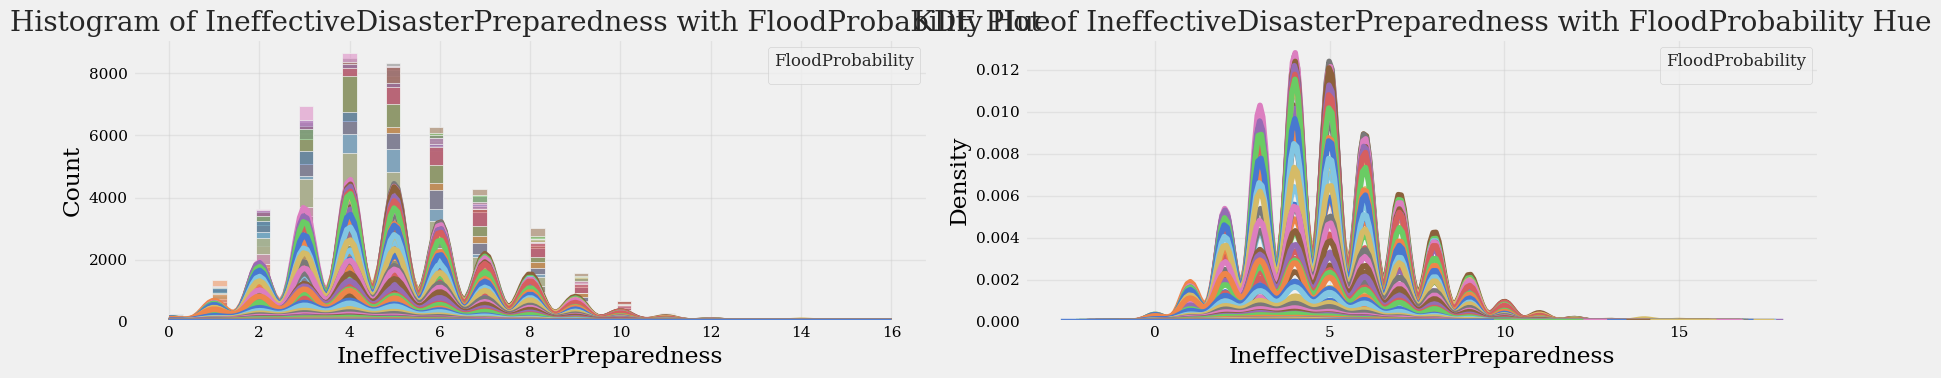

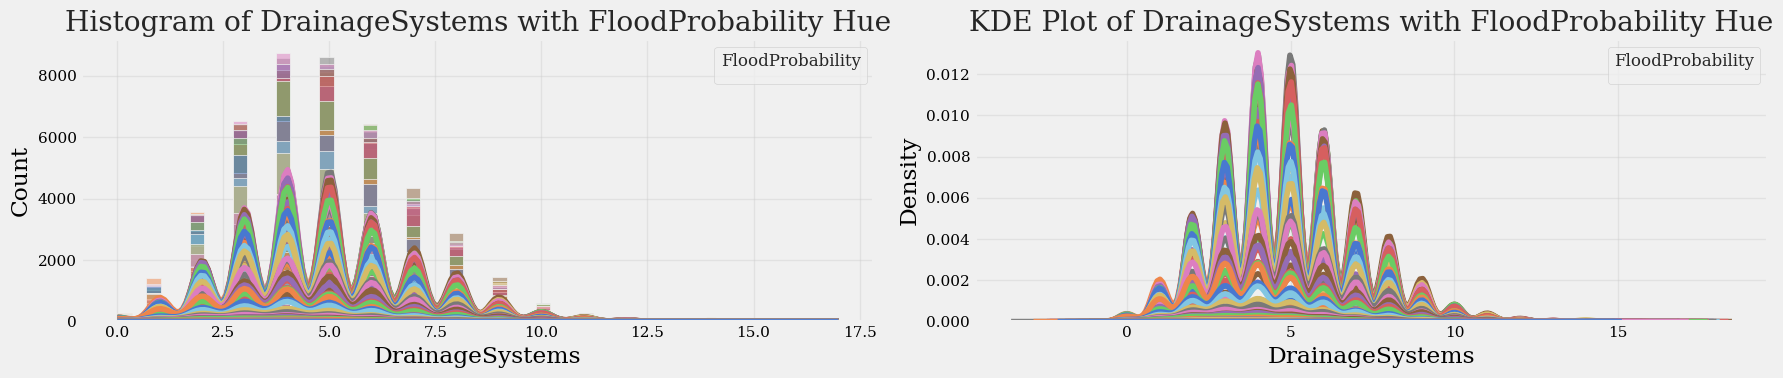

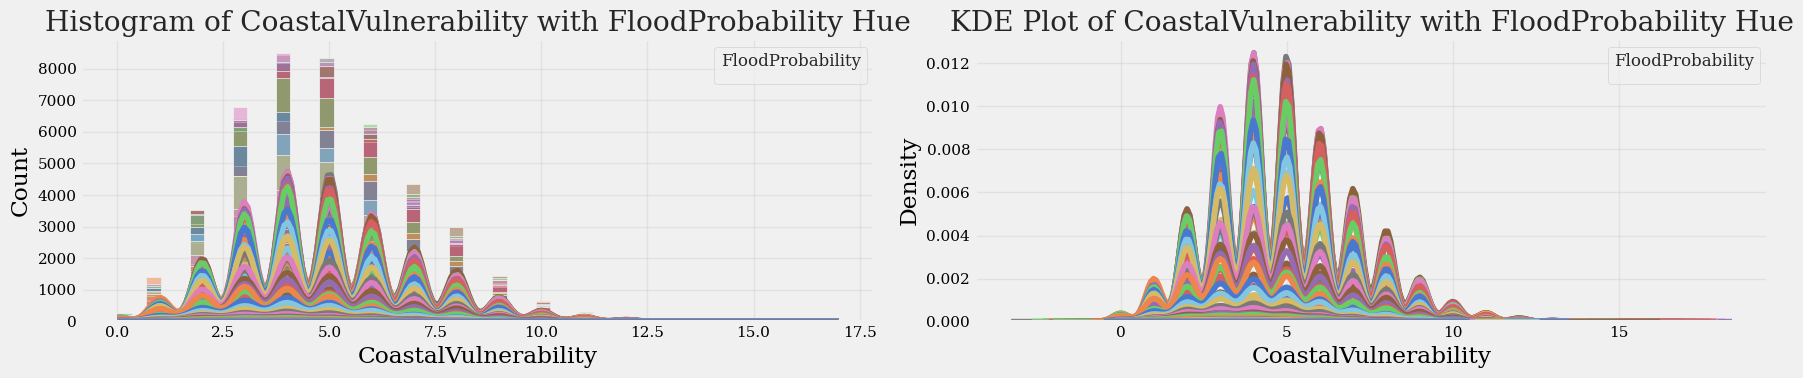

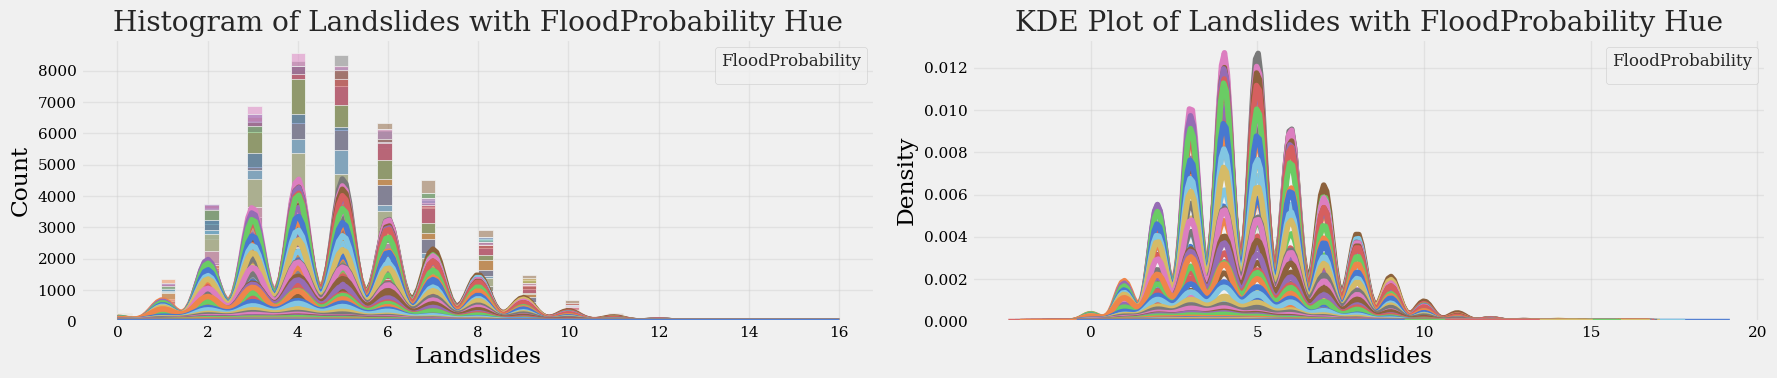

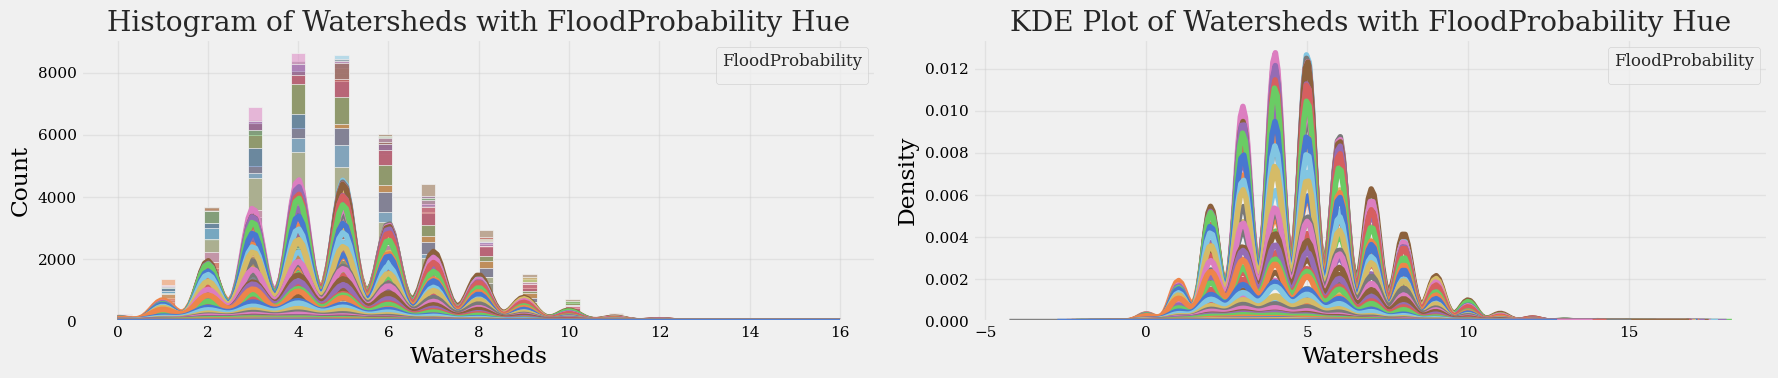

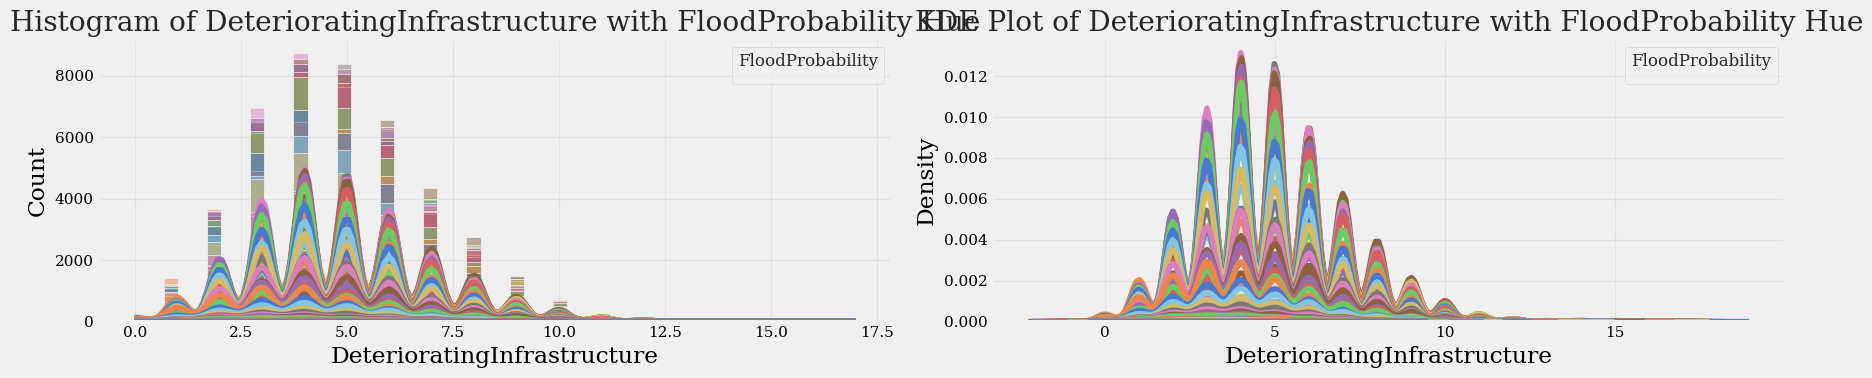

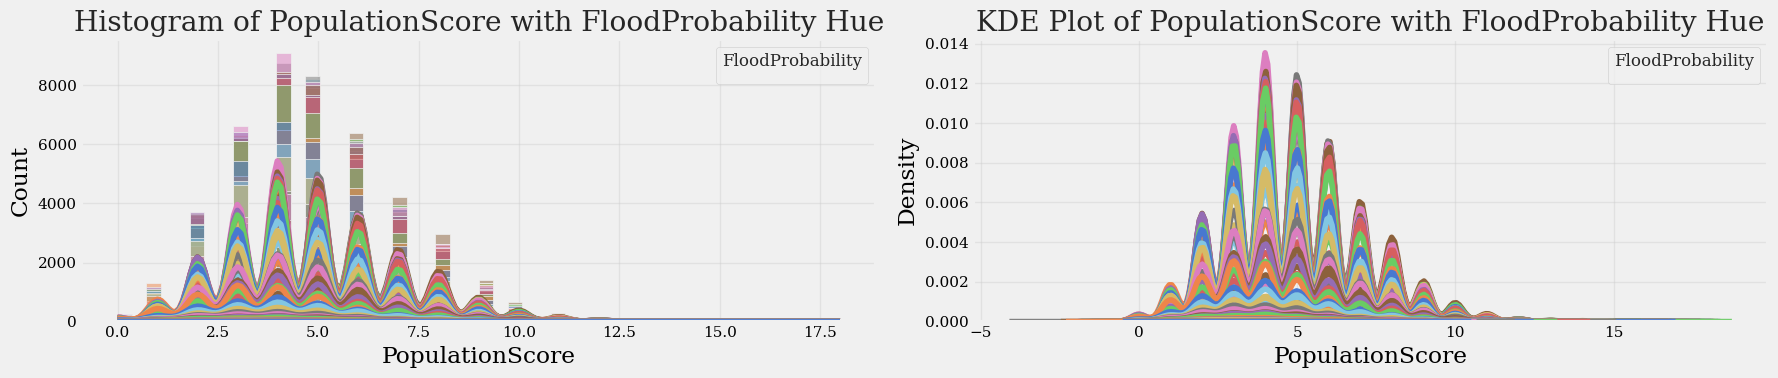

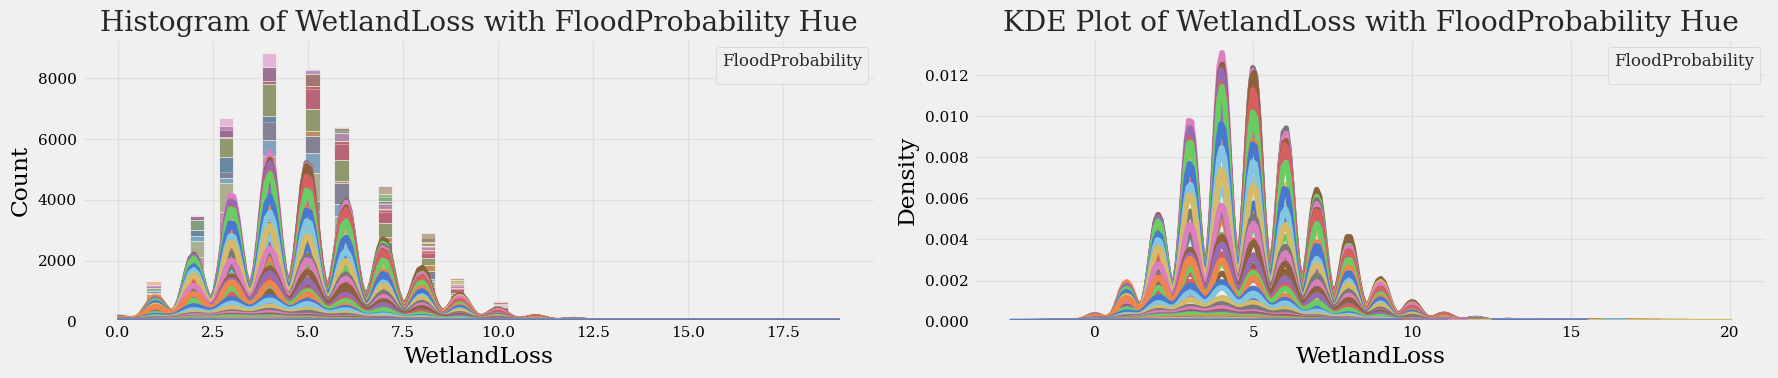

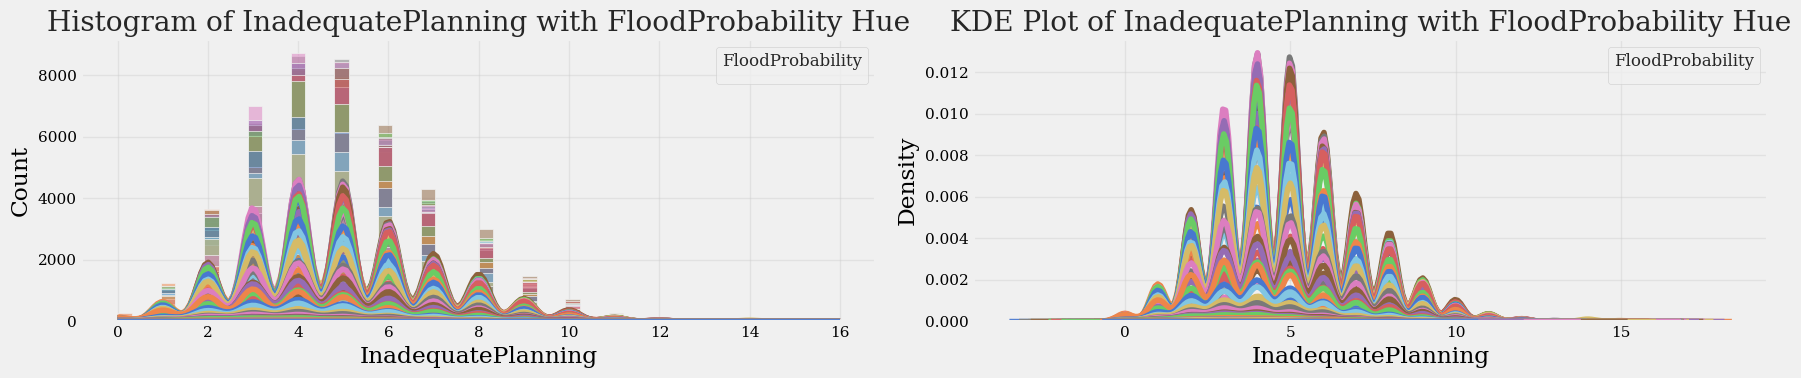

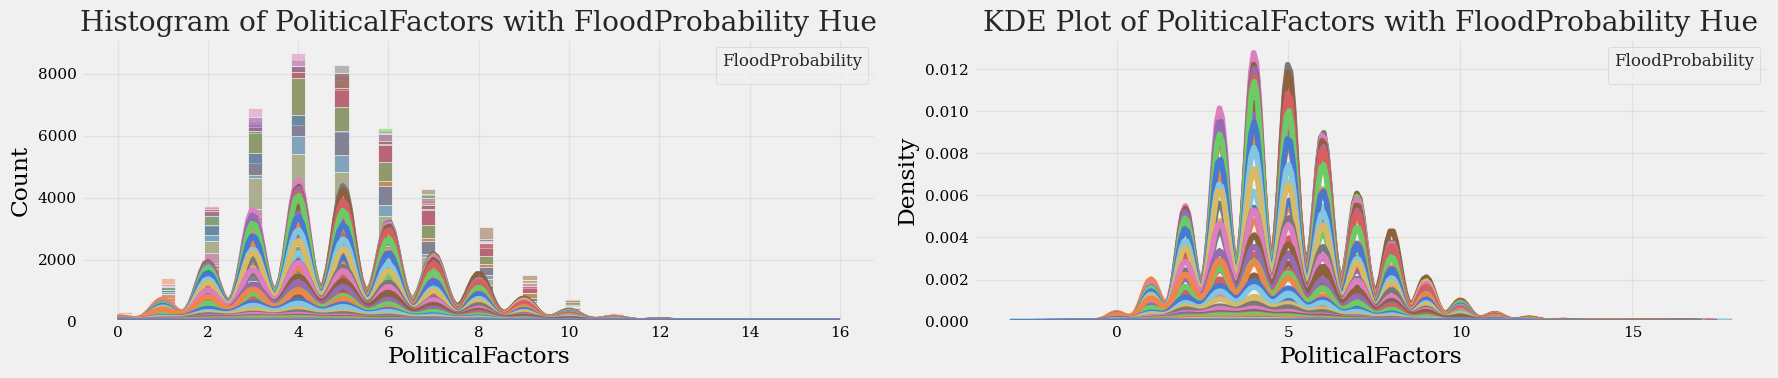

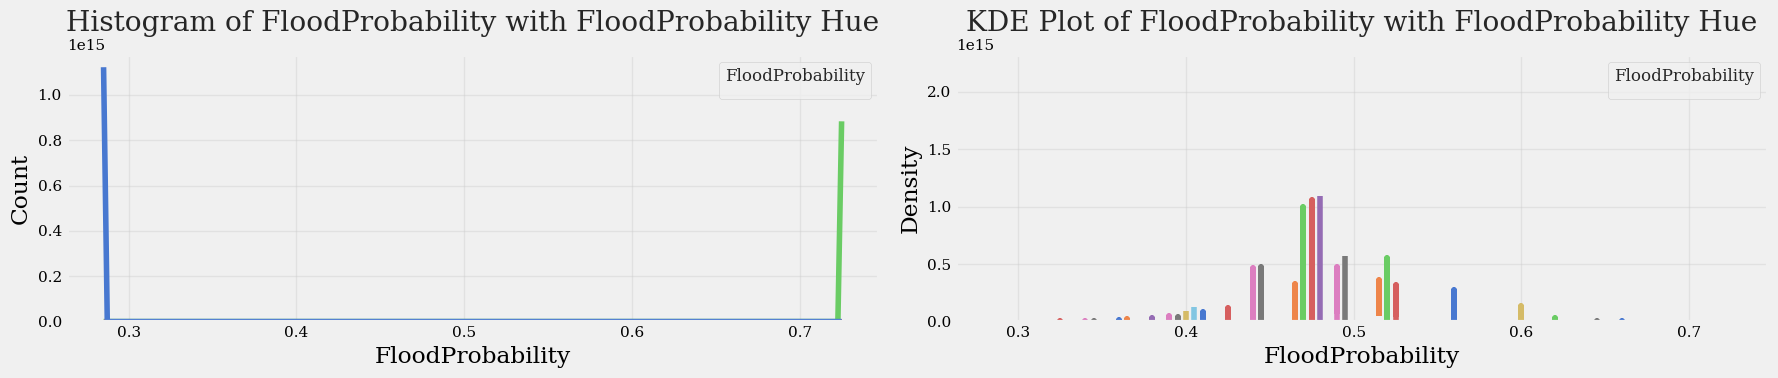

In [16]:
# Set up warnings to be ignored (optional)
warnings.filterwarnings("ignore")
pd.set_option('mode.use_inf_as_na', False)

# List of continuous variables in your dataset


# Set hue to your target column
target_column = 'FloodProbability'

for column in continuous_vars:
    fig, axes = plt.subplots(1, 2, figsize=(18, 4))  # Create subplots with 1 row and 2 columns
    
    # Plot histogram with hue
    sns.histplot(data=train_data, x=column, hue=target_column, bins=50, kde=True, ax=axes[0], palette='muted')
    axes[0].set_title(f'Histogram of {column} with {target_column} Hue')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    axes[0].legend(title=target_column, loc='upper right')
    
    # Plot KDE plot with hue
    sns.kdeplot(data=train_data, x=column, hue=target_column, ax=axes[1], palette='muted')
    axes[1].set_title(f'KDE Plot of {column} with {target_column} Hue')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Density')
    axes[1].legend(title=target_column, loc='upper right')
    
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">✨ANALYSIS BY QQ PLOT✨ </div>

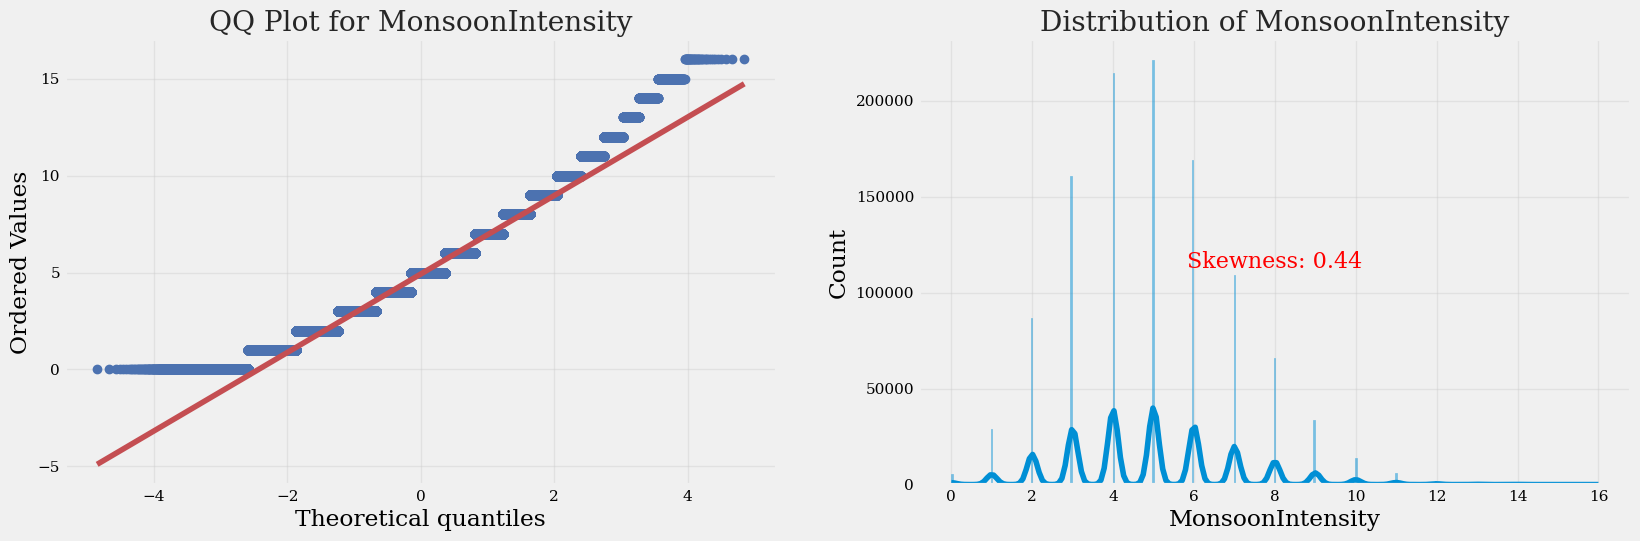

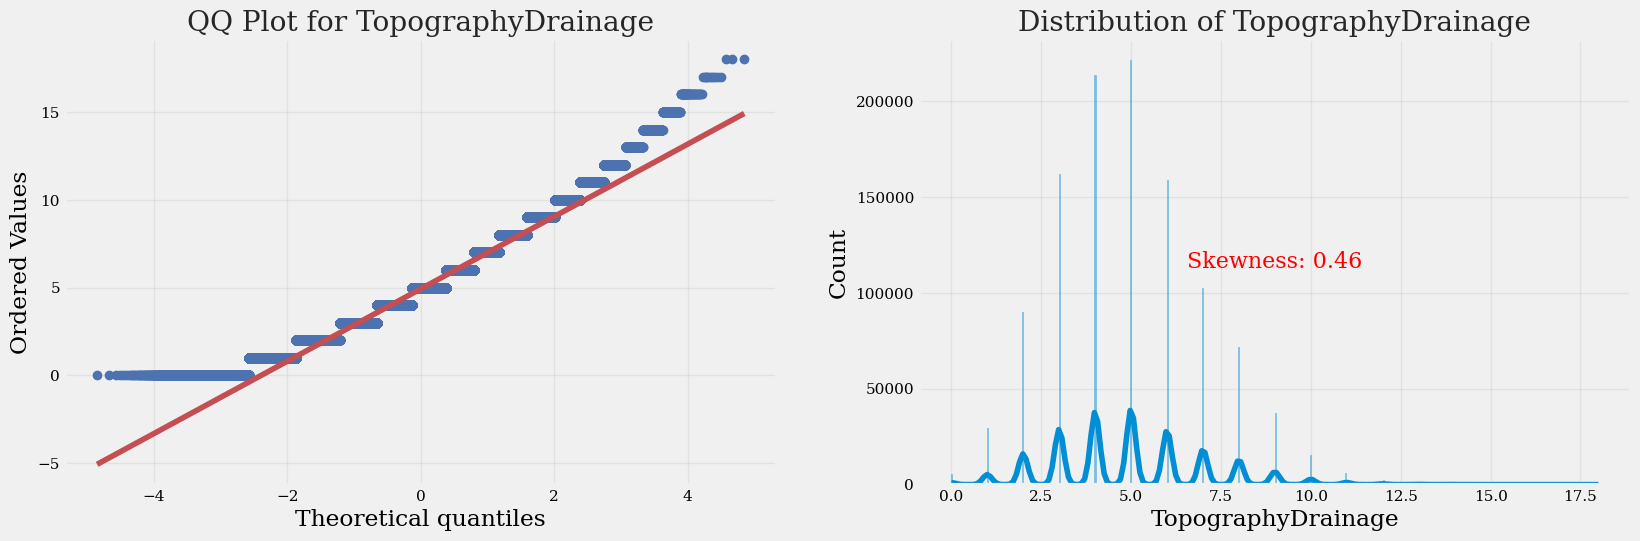

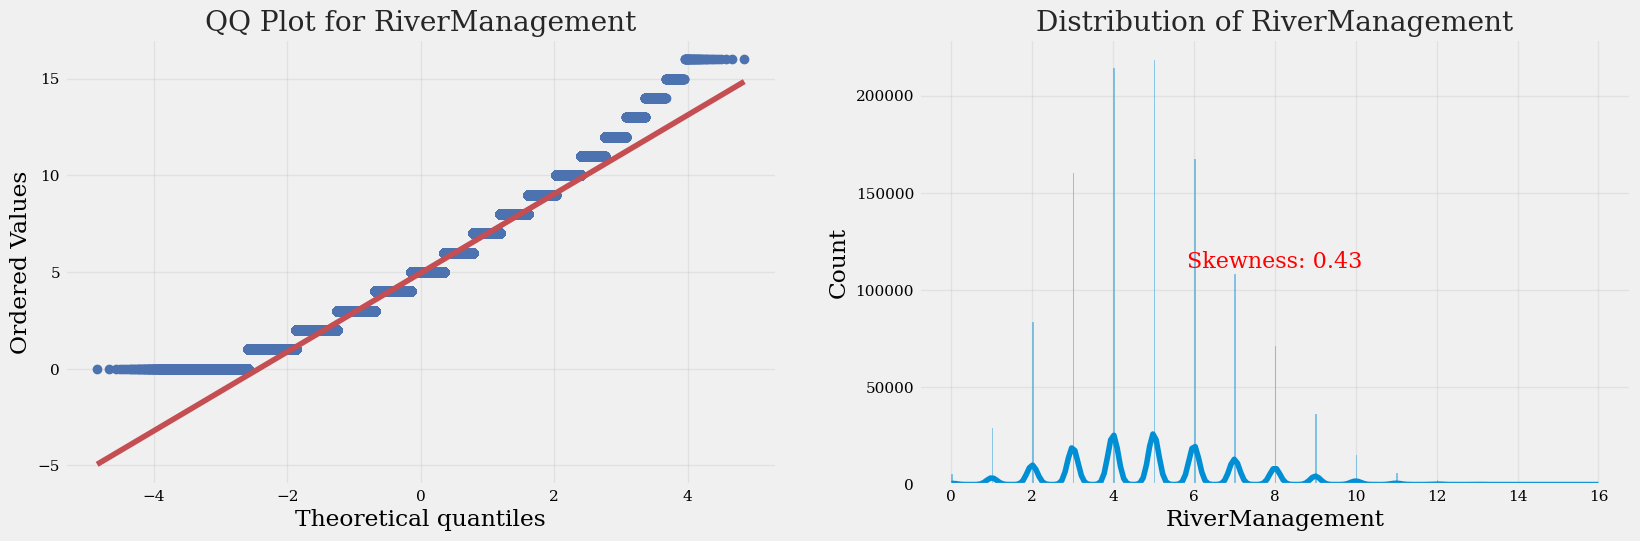

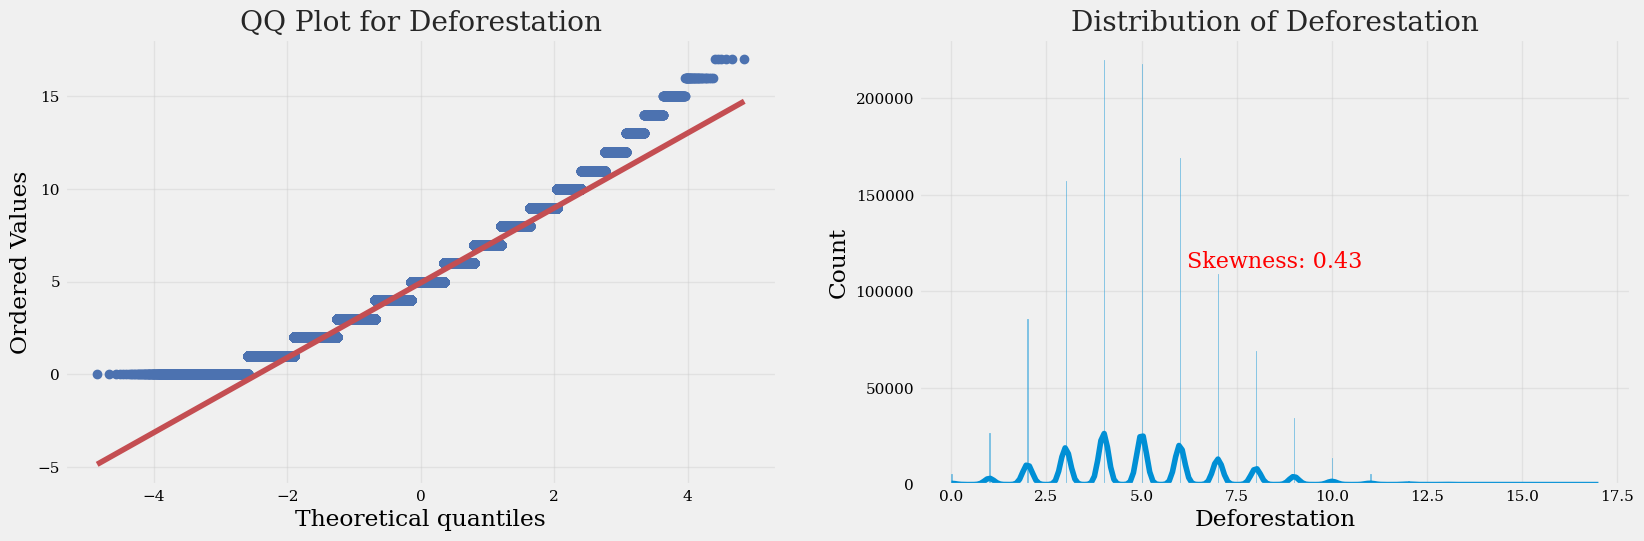

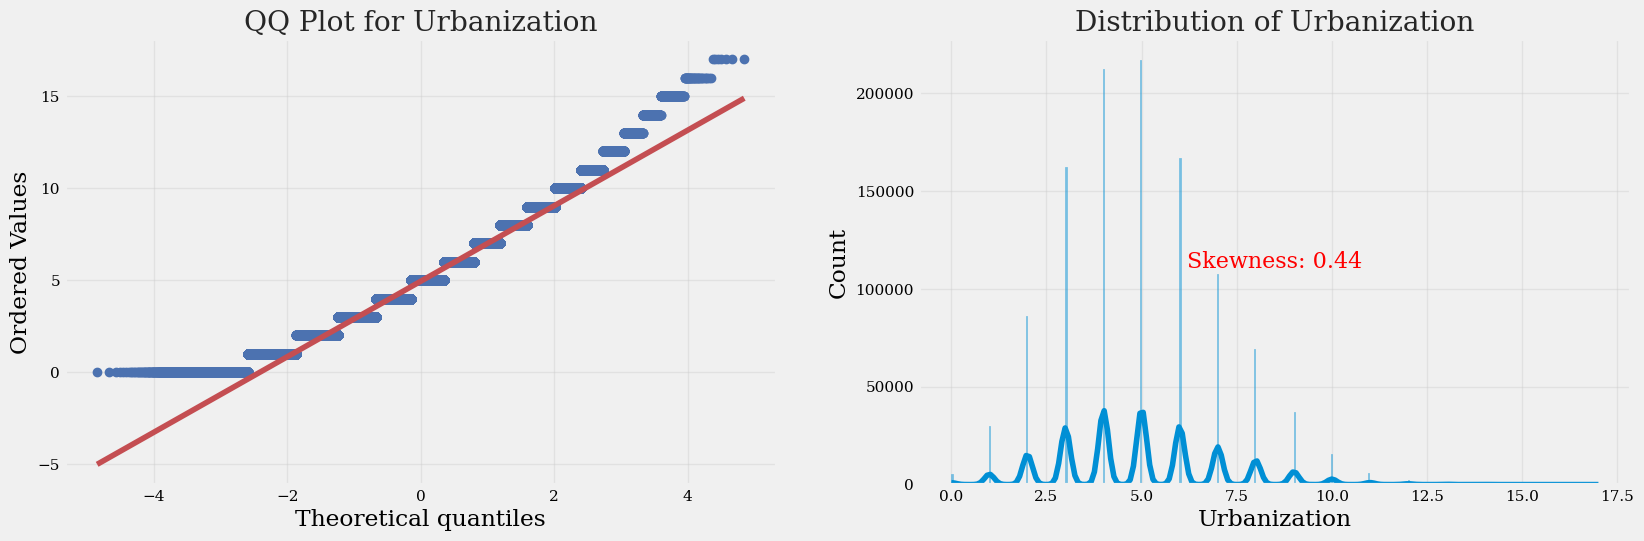

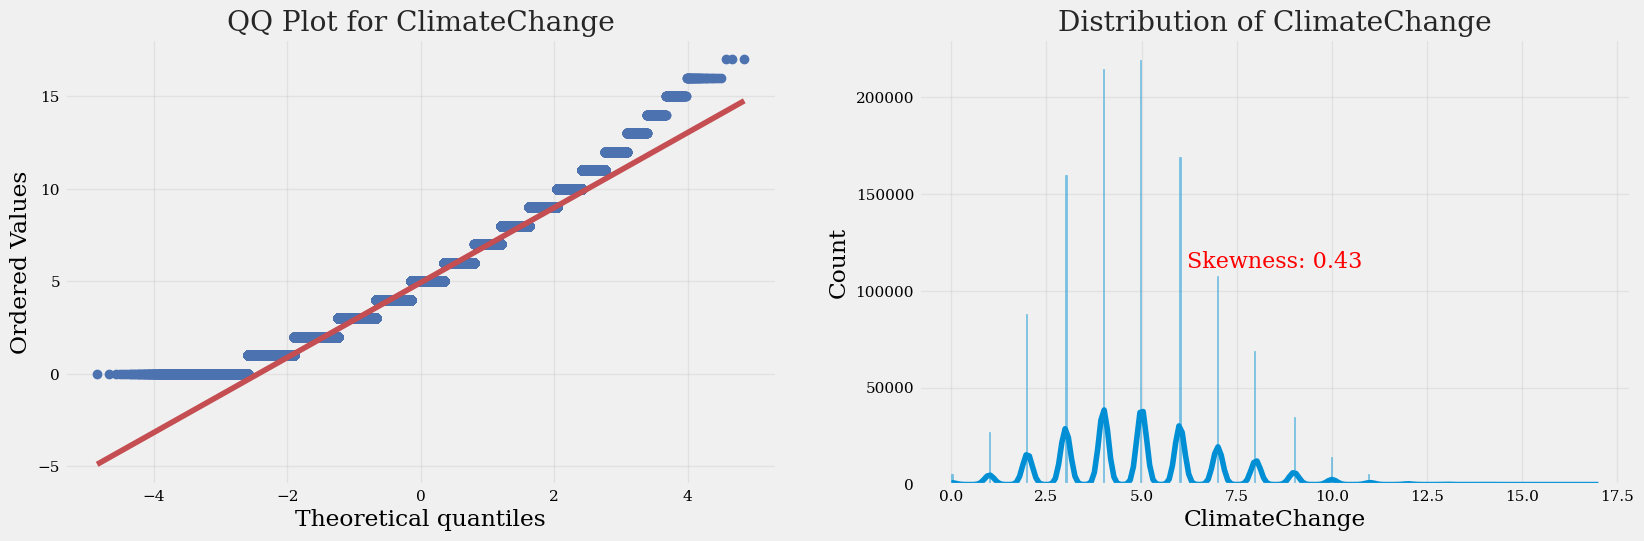

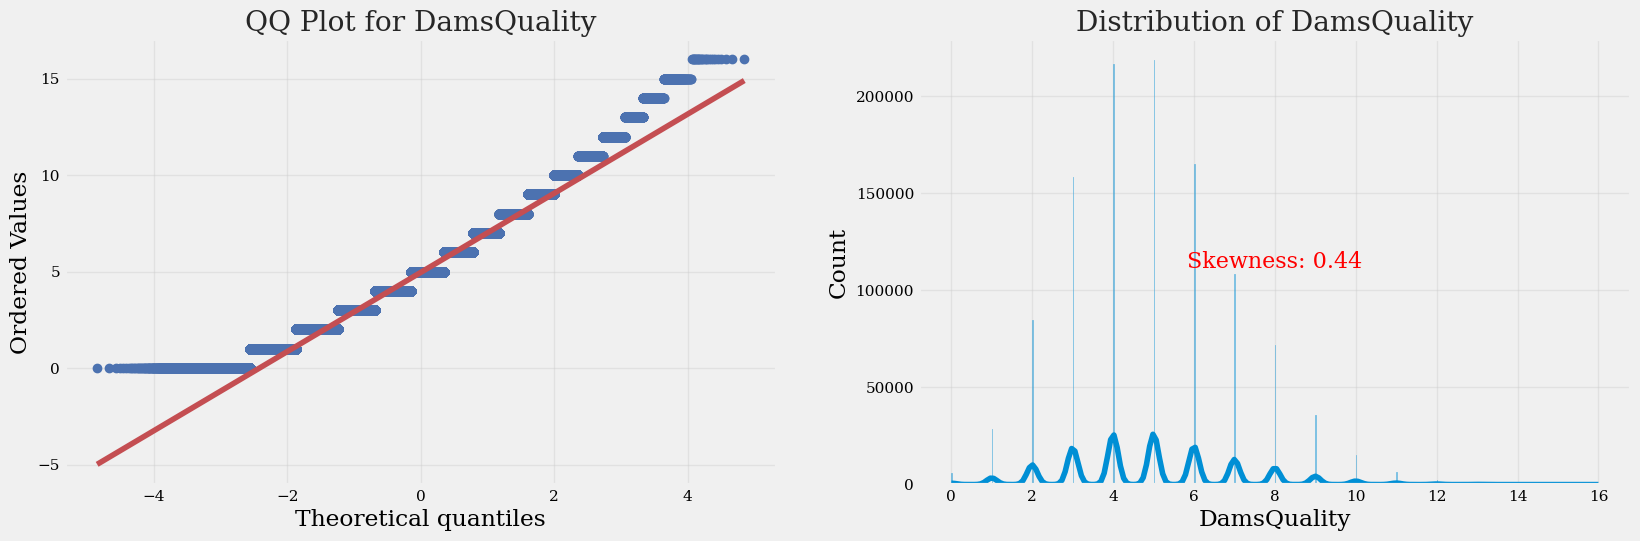

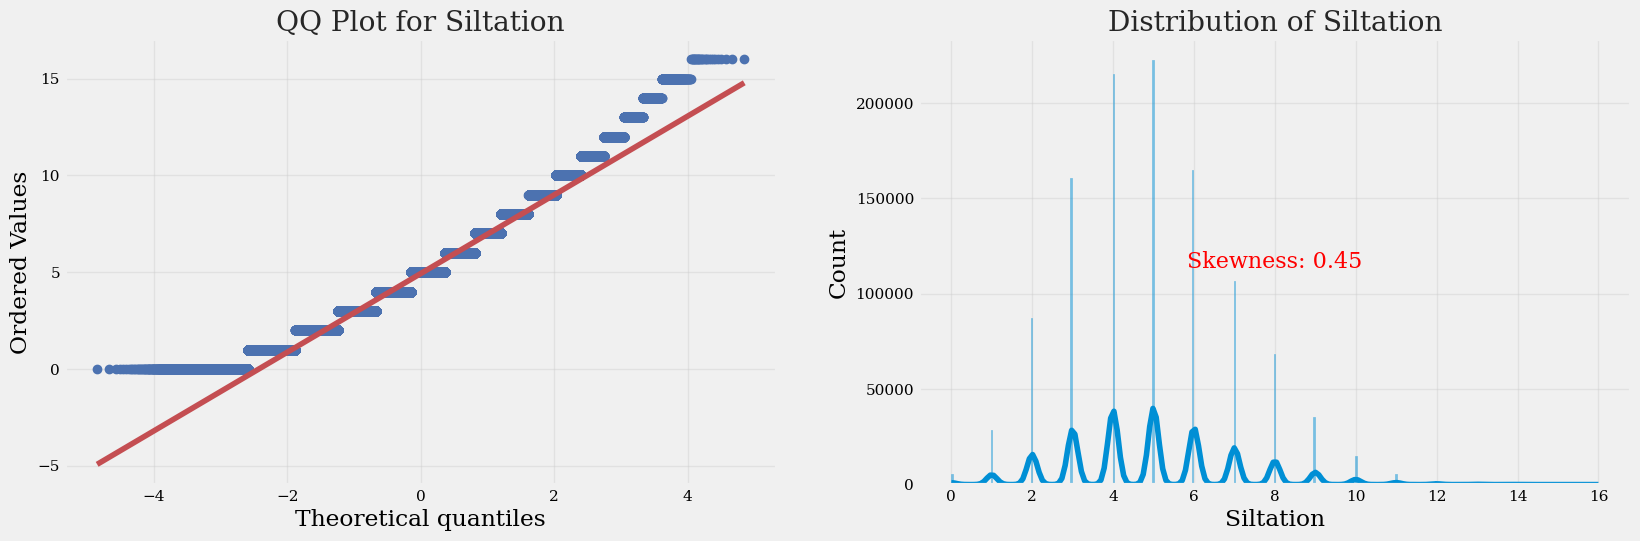

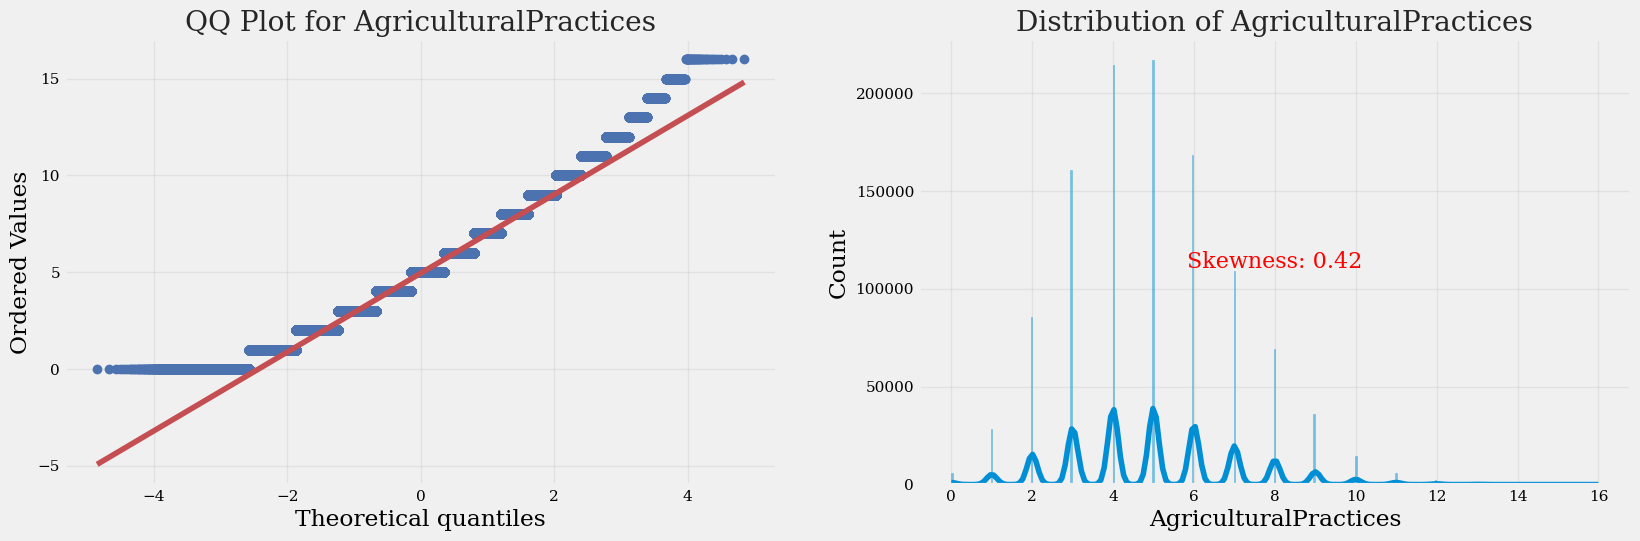

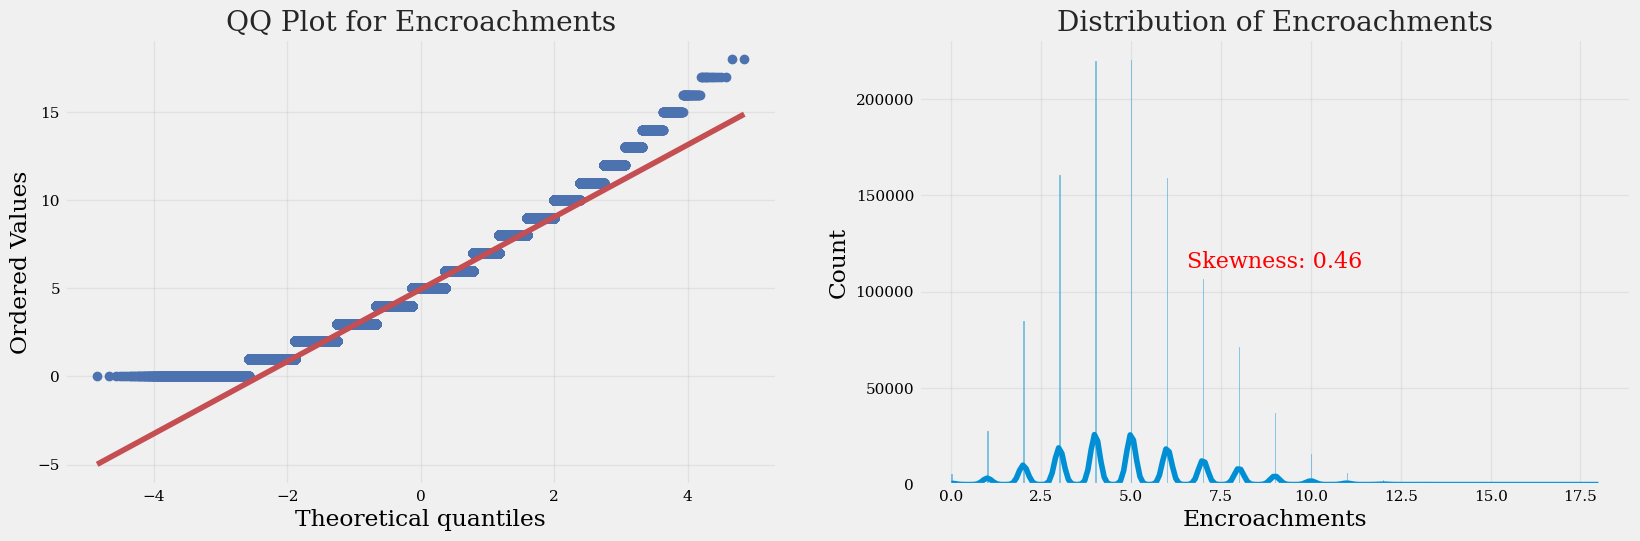

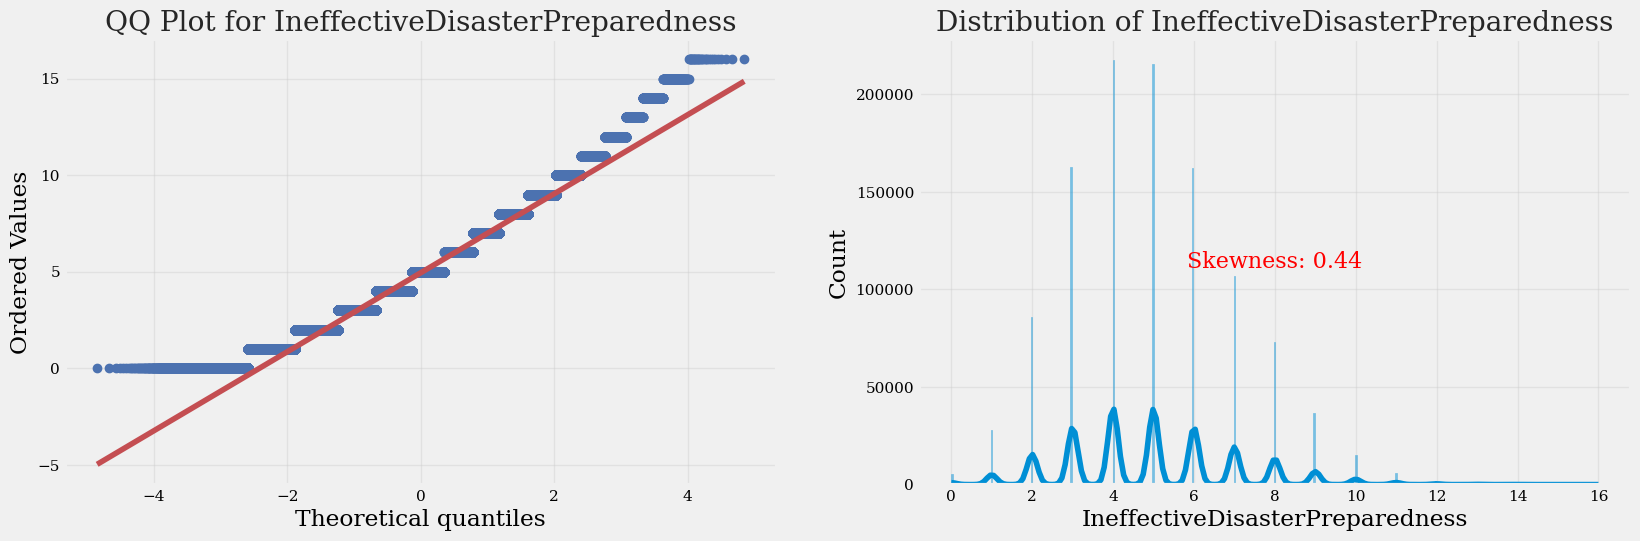

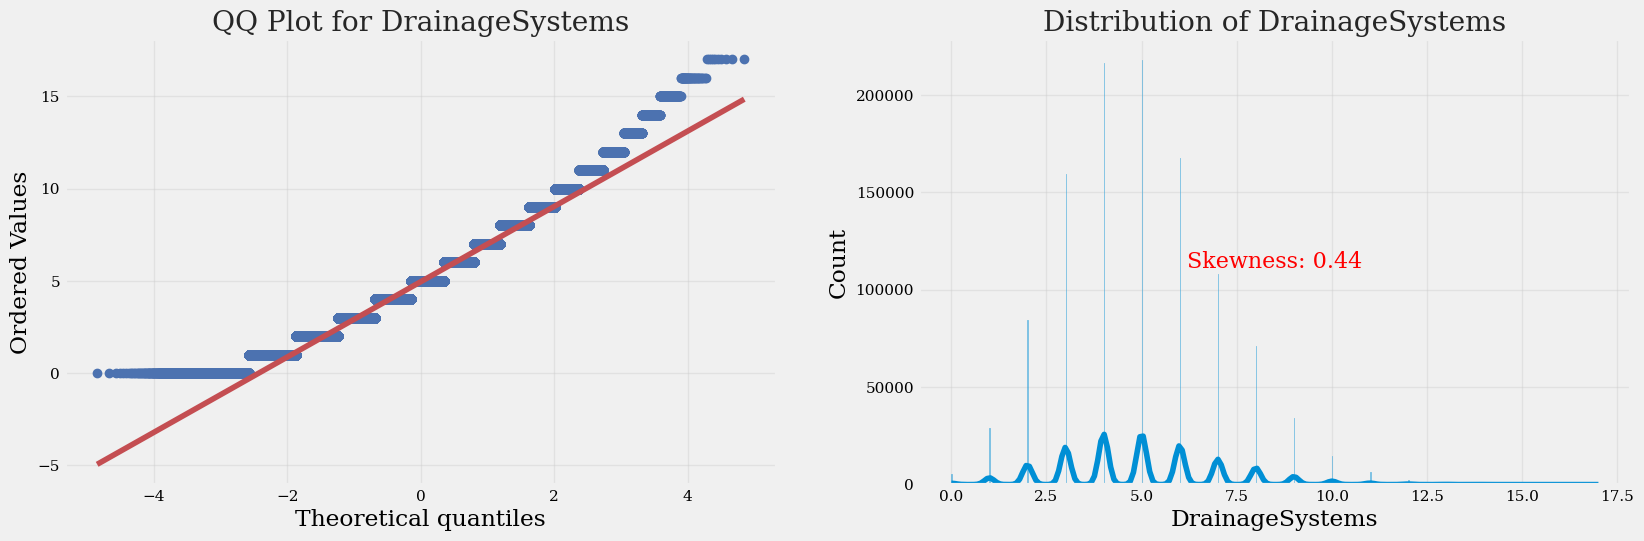

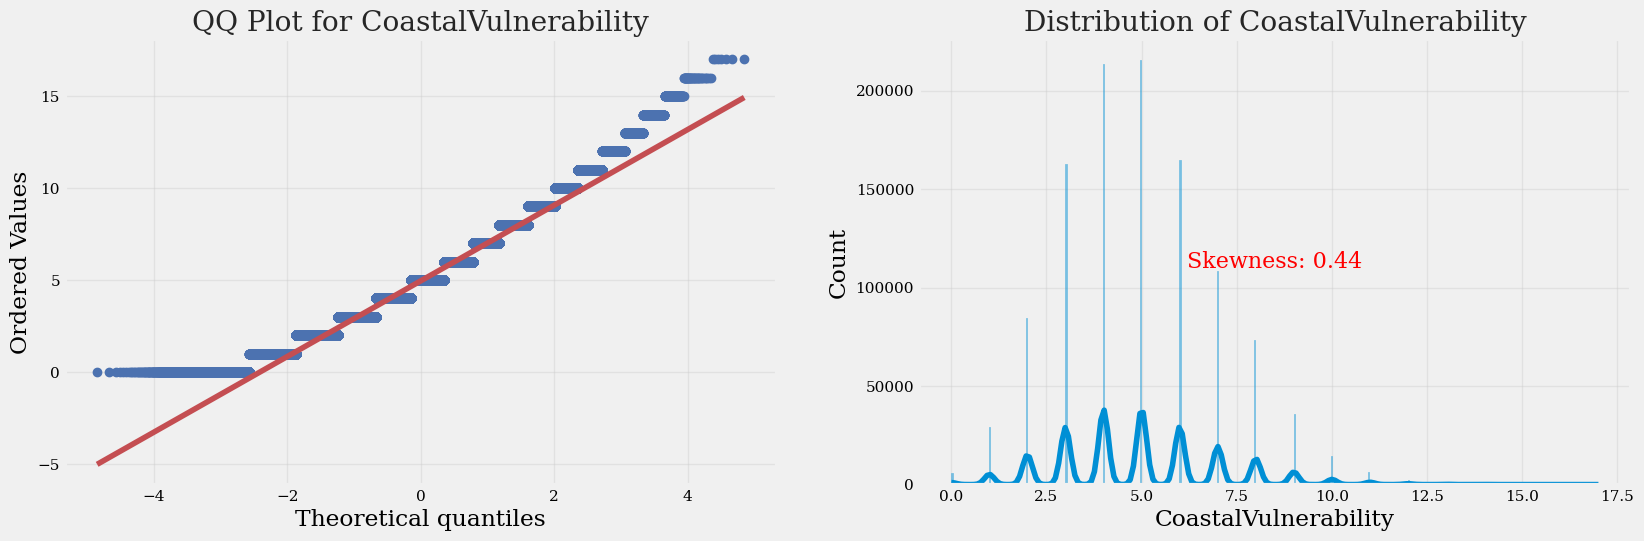

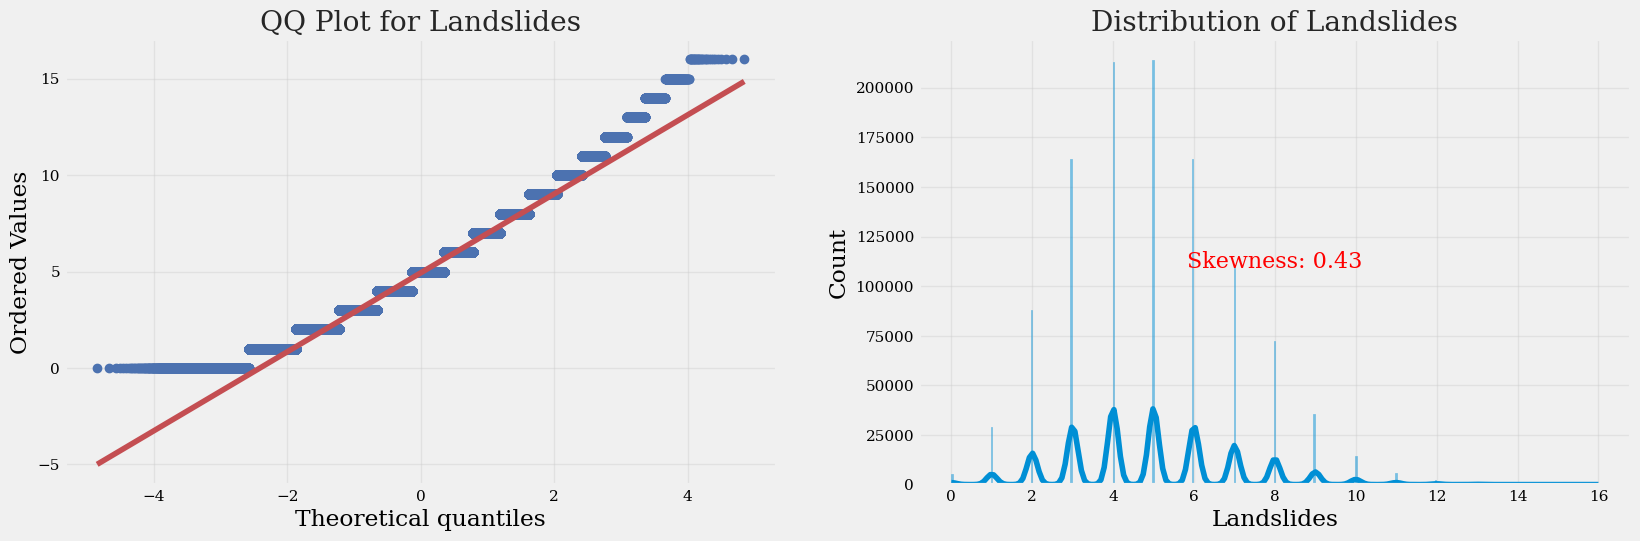

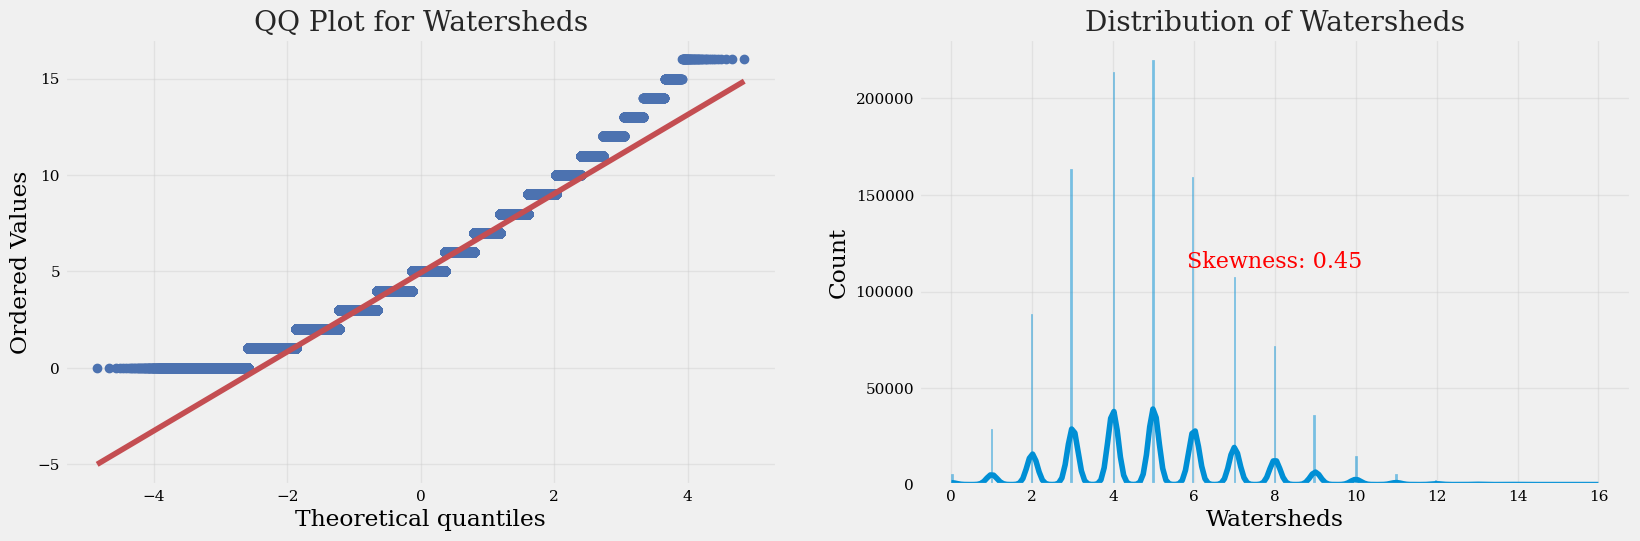

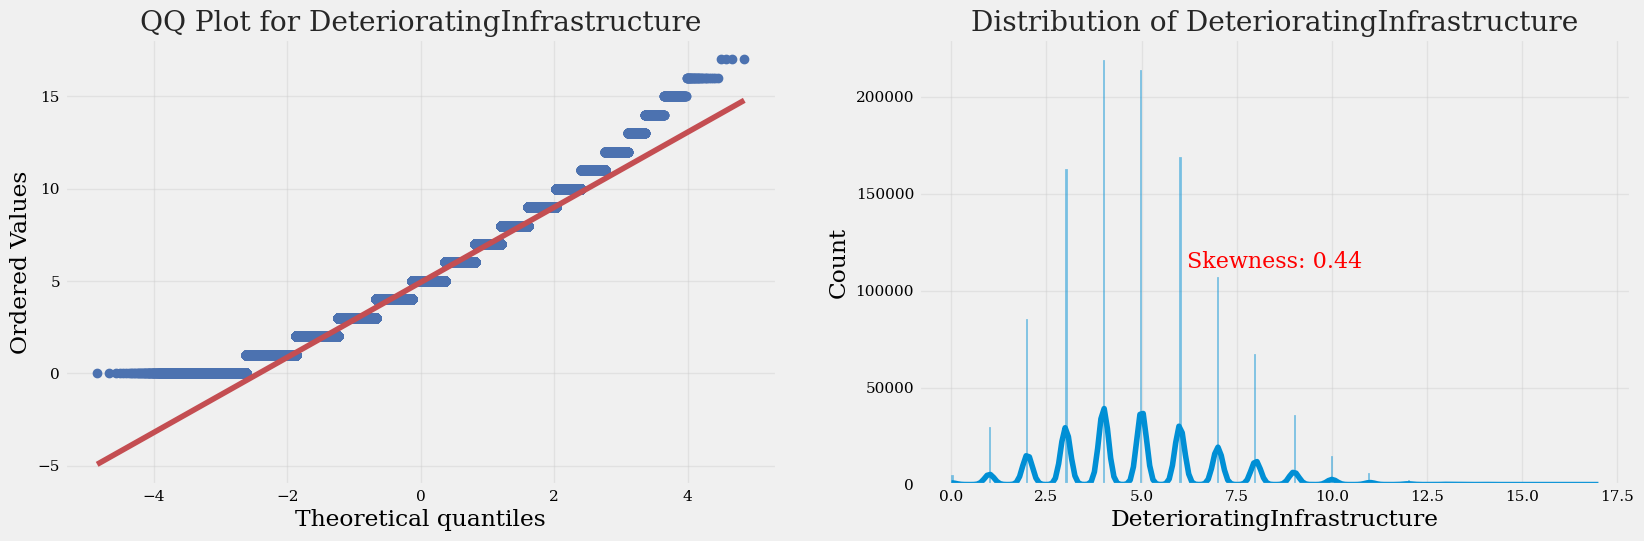

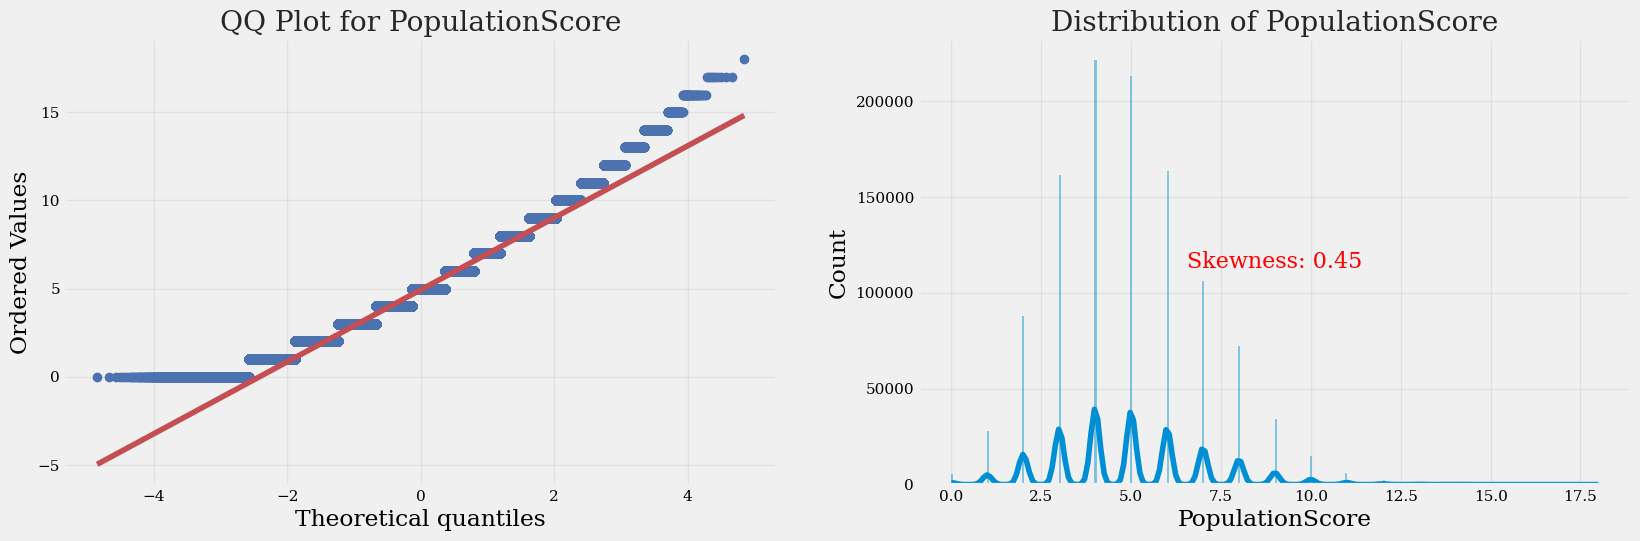

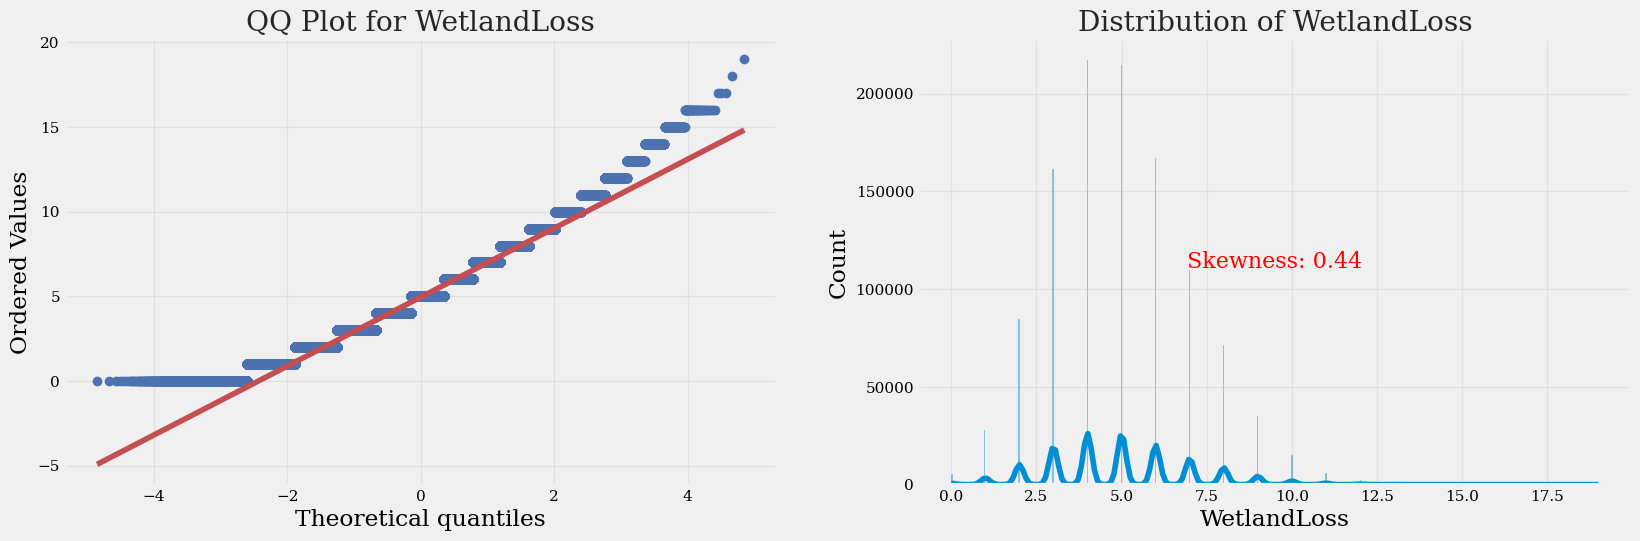

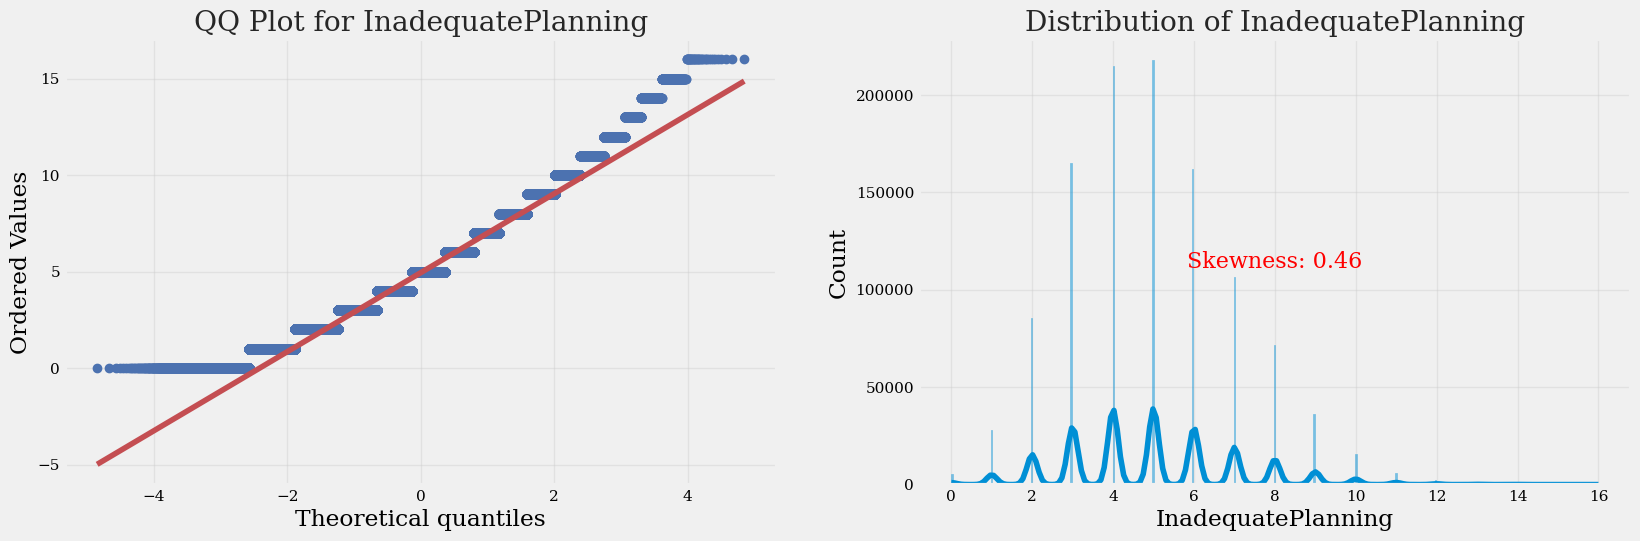

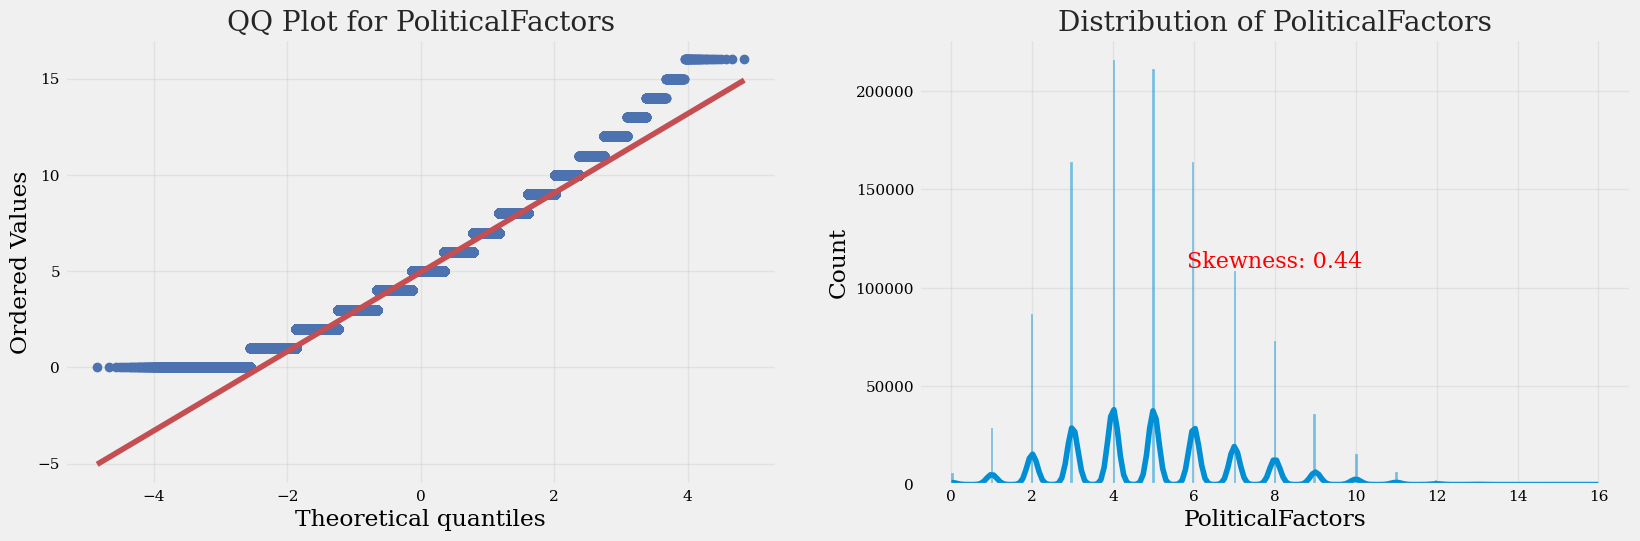

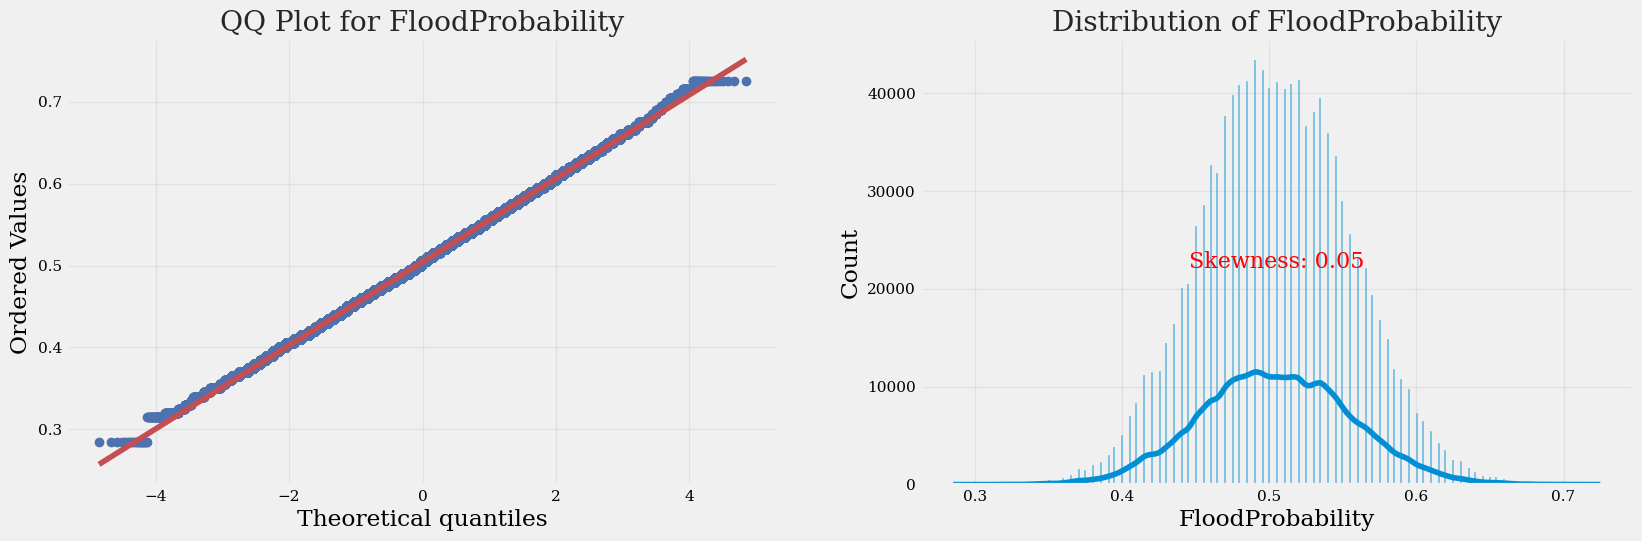

In [17]:
import scipy.stats as stats  
def qq_plot_with_skewness(data, quantitative_var):
    # Check if the variable is present in the DataFrame
    if quantitative_var not in data.columns:
        print(f"Error: '{quantitative_var}' not found in the DataFrame.")
        return
    
    f, ax = plt.subplots(1, 2, figsize=(18, 5.5))

    # Check for missing values
    if data[quantitative_var].isnull().any():
        print(f"Warning: '{quantitative_var}' contains missing values. Results may be affected.")

    # QQ plot
    stats.probplot(data[quantitative_var], plot=ax[0], fit=True)
    ax[0].set_title(f'QQ Plot for {quantitative_var}')

    # Skewness plot
    sns.histplot(data[quantitative_var], kde=True, ax=ax[1])
    ax[1].set_title(f'Distribution of {quantitative_var}')

    # Calculate skewness value
    skewness_value = stats.skew(data[quantitative_var])

    # Display skewness value on the plot
    ax[1].text(0.5, 0.5, f'Skewness: {skewness_value:.2f}', transform=ax[1].transAxes, 
               horizontalalignment='center', verticalalignment='center', fontsize=16, color='red')

    plt.show()
# Example usage for each continuous variable
for var in continuous_vars:
    qq_plot_with_skewness(train_data, var)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔍FEATURE ENGENEERING🔍</div>

In [18]:
# Feature Interaction
train_data['Urbanization_Deforestation_Interaction'] = train_data['Urbanization'] * train_data['Deforestation']

# Ratio Features
train_data['Urbanization_TopographyDrainage_Ratio'] = train_data['Urbanization'] / (train_data['TopographyDrainage'] + 1)  # Added 1 to avoid division by zero

# Aggregated Features (Example: Sum of selected columns)
selected_columns = ['Urbanization', 'Deforestation', 'AgriculturalPractices', 'InadequatePlanning']
train_data['Sum_Selected_Columns'] = train_data[selected_columns].sum(axis=1)

In [19]:
# Feature Interaction
test_data['Urbanization_Deforestation_Interaction'] = test_data['Urbanization'] * test_data['Deforestation']

# Ratio Features
test_data['Urbanization_TopographyDrainage_Ratio'] = test_data['Urbanization'] / (test_data['TopographyDrainage'] + 1)  # Added 1 to avoid division by zero

# Aggregated Features (Example: Sum of selected columns)
selected_columns = ['Urbanization', 'Deforestation', 'AgriculturalPractices', 'InadequatePlanning']
test_data['Sum_Selected_Columns'] = test_data[selected_columns].sum(axis=1)

In [20]:
train_data.sample(10).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

In [21]:
test_data.sample(10).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#1565C0', 'font-weight': 'bold'})


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔍OUTLIERS CHECK BY BOX PLOT🔍</div>

In [22]:
unique_counts = train_data.nunique()
#Threshold to distinguish continous and categorical
threshold = 12
continuous_vars_temp = unique_counts[unique_counts > threshold].index.tolist()
#categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()
if 'id' in continuous_vars_temp:
    continuous_vars_temp.remove('id')

In [23]:
unique_counts_test = test_data.nunique()
#Threshold to distinguish continous and categorical
threshold = 12
continuous_vars_temp_test = unique_counts_test[unique_counts_test > threshold].index.tolist()
#categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()
if 'id' in continuous_vars_temp_test:
    continuous_vars_temp_test.remove('id')

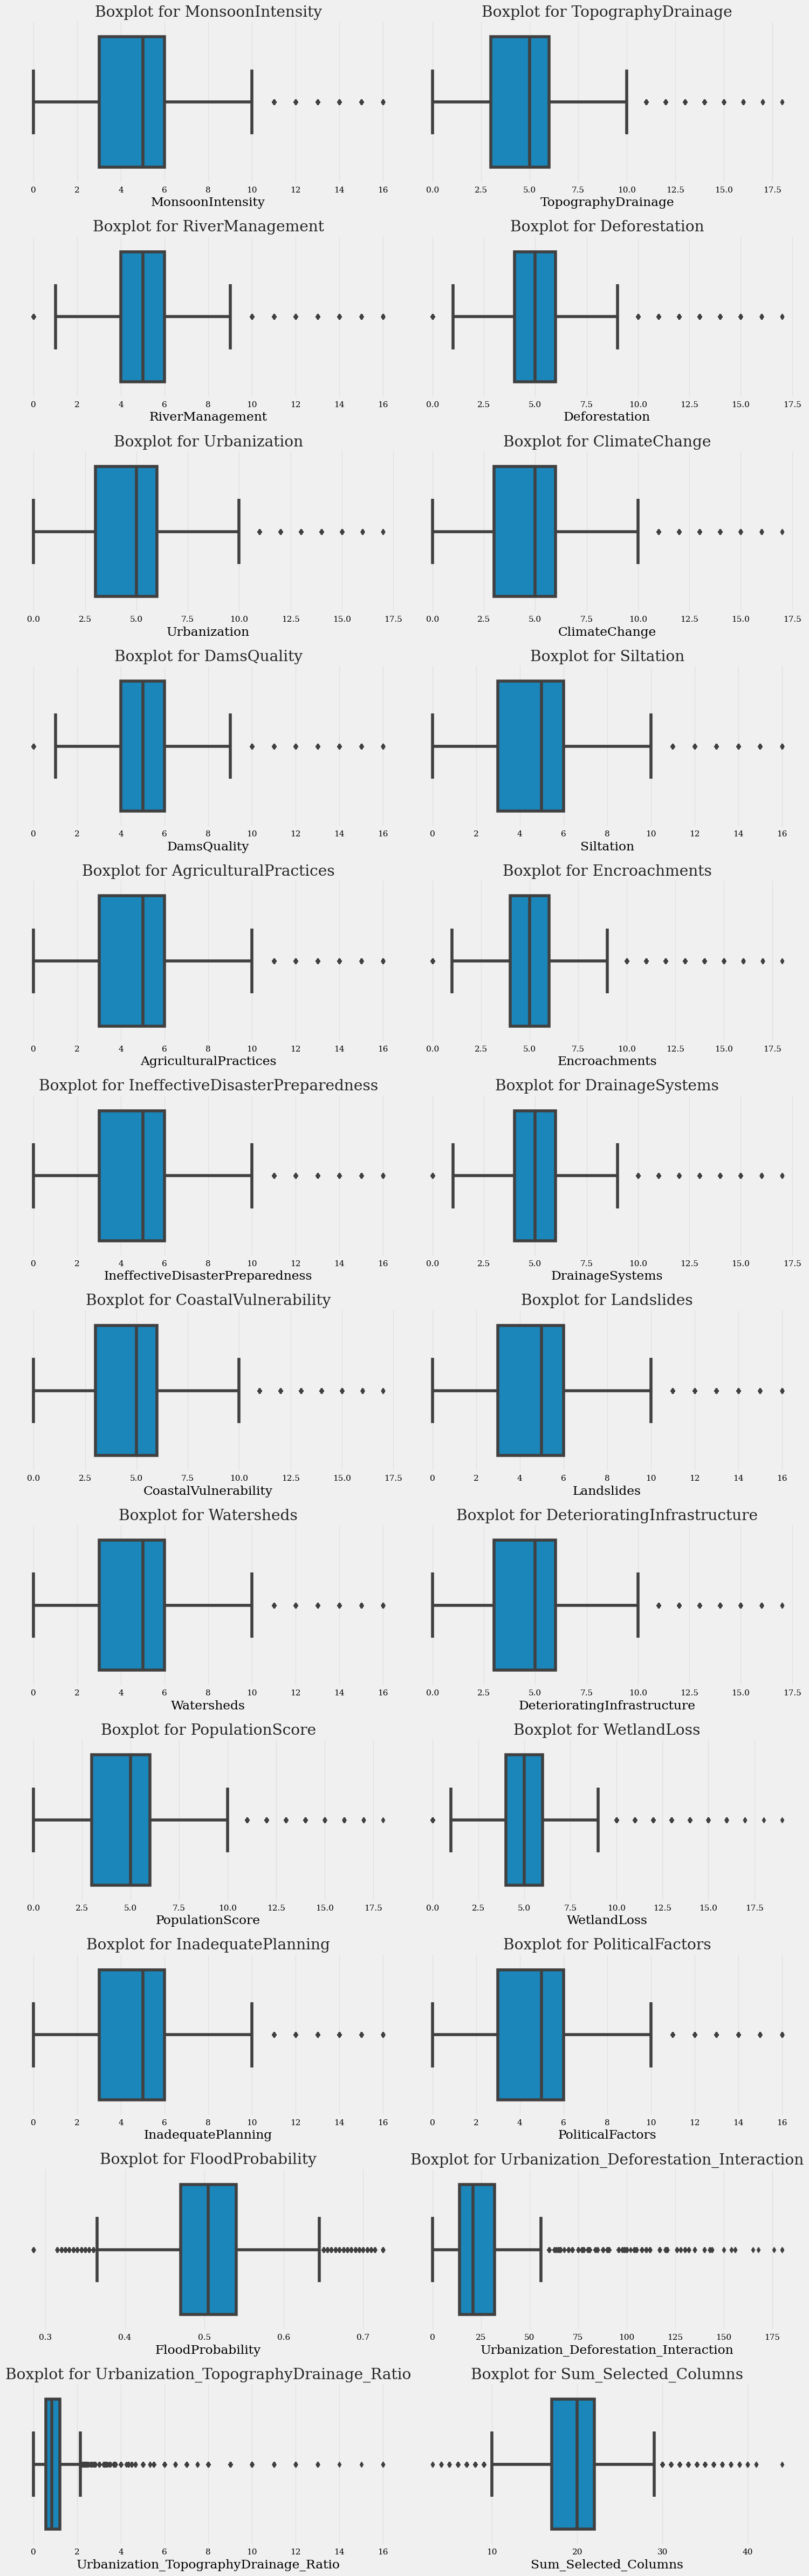

In [24]:
def plot_boxplots(data, columns, ncols=2):
    nrows = (len(columns) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))

    for i, column in enumerate(columns):
        ax = axes[i // ncols, i % ncols] if nrows > 1 else axes[i % ncols]

        if data[column].dtype == 'O':  # 'O' represents object (categorical) dtype
            sns.countplot(x=column, data=data, ax=ax)
            ax.set_title(f'Countplot for {column}')
        else:
            sns.boxplot(x=column, data=data, ax=ax)
            ax.set_title(f'Boxplot for {column}')

    plt.tight_layout()
    plt.show()

plot_boxplots(train_data, continuous_vars_temp)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🎇REMOVING THE OUTLIERS🎇</div>

In [25]:
def remove_outliers_replace(data, columns, threshold=1.5):
    data_no_outliers = data.copy()

    for column in columns:
        Q1 = data_no_outliers[column].quantile(0.25)
        Q3 = data_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        is_outlier = (data_no_outliers[column] < lower_bound) | (data_no_outliers[column] > upper_bound)

        if data_no_outliers[column].dtype == 'O':  # Categorical column
            median_value = data_no_outliers.loc[~is_outlier, column].mode().iloc[0]
            data_no_outliers.loc[is_outlier, column] = median_value
        else:  # Numerical column
            mean_value = data_no_outliers.loc[~is_outlier, column].mean()
            data_no_outliers.loc[is_outlier, column] = mean_value

    return data_no_outliers

columns_to_remove_outliers_replace = continuous_vars_temp
train_data = remove_outliers_replace(train_data, columns_to_remove_outliers_replace)

In [26]:
columns_to_remove_outliers_replace = continuous_vars_temp_test
test_data = remove_outliers_replace(test_data, columns_to_remove_outliers_replace)

In [27]:
"""def plot_boxplots(data, columns, ncols=2):
    nrows = (len(columns) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))

    for i, column in enumerate(columns):
        ax = axes[i // ncols, i % ncols] if nrows > 1 else axes[i % ncols]

        if data[column].dtype == 'O':  # 'O' represents object (categorical) dtype
            sns.countplot(x=column, data=data, ax=ax)
            ax.set_title(f'Countplot for {column}')
        else:
            sns.boxplot(x=column, data=data, ax=ax)
            ax.set_title(f'Boxplot for {column}')

    plt.tight_layout()
    plt.show()

plot_boxplots(train_data, continuous_vars_temp)"""

"def plot_boxplots(data, columns, ncols=2):\n    nrows = (len(columns) + ncols - 1) // ncols\n    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))\n\n    for i, column in enumerate(columns):\n        ax = axes[i // ncols, i % ncols] if nrows > 1 else axes[i % ncols]\n\n        if data[column].dtype == 'O':  # 'O' represents object (categorical) dtype\n            sns.countplot(x=column, data=data, ax=ax)\n            ax.set_title(f'Countplot for {column}')\n        else:\n            sns.boxplot(x=column, data=data, ax=ax)\n            ax.set_title(f'Boxplot for {column}')\n\n    plt.tight_layout()\n    plt.show()\n\nplot_boxplots(train_data, continuous_vars_temp)"

In [28]:
train_data.drop(columns='id',axis = 1,inplace = True)

In [29]:
train_data.sample(10).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">Dividing the independent and dependent columns seperately</div>

In [30]:
X = train_data.drop(columns='FloodProbability', axis=1)
y = train_data['FloodProbability']

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🤝CORRELATION🤝</div>

![](https://d3rw207pwvlq3a.cloudfront.net/attachments/000/134/038/original/correlation-examples_%281%29.svg?1598945425)

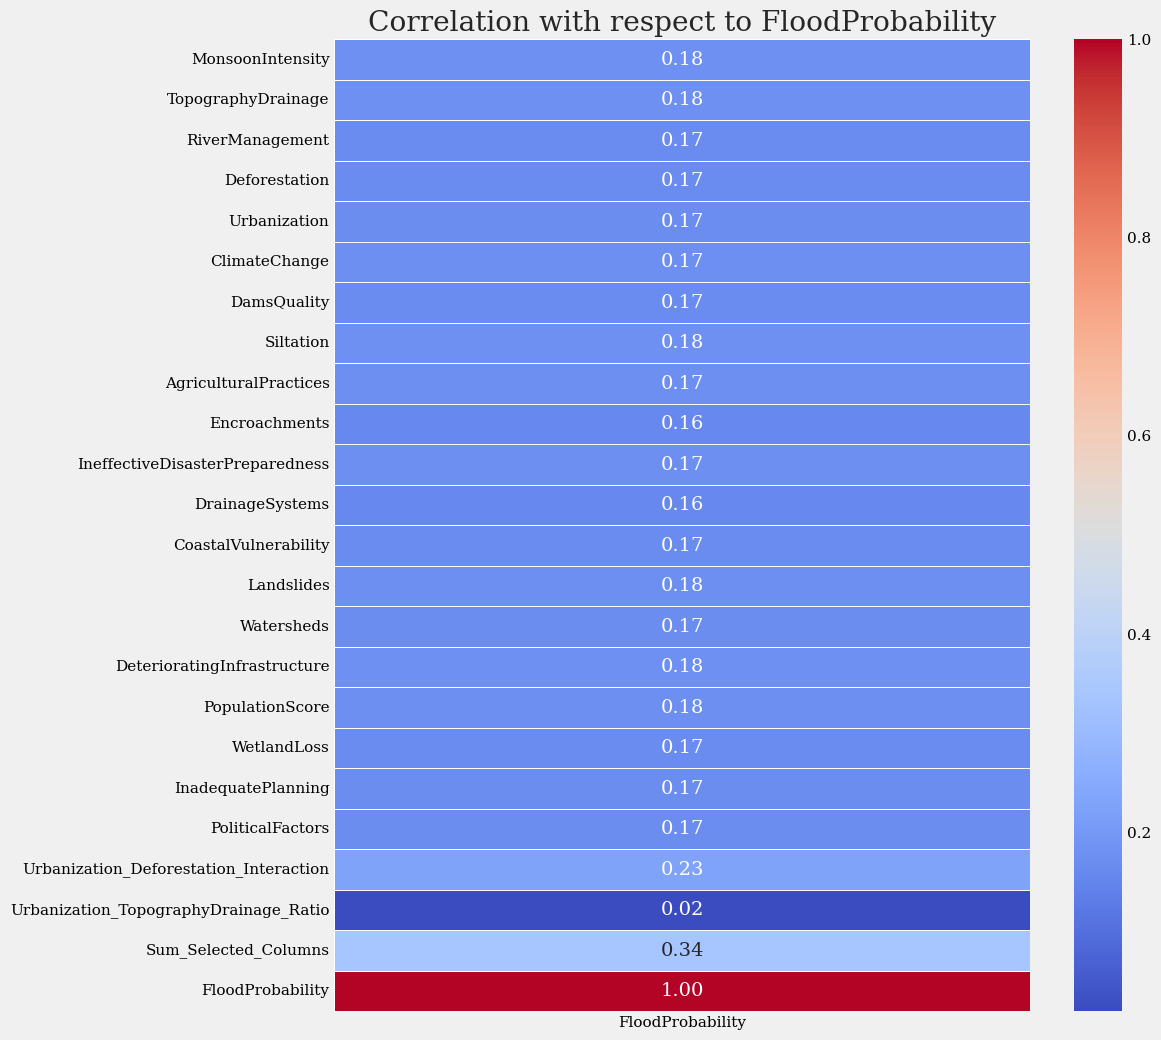

In [31]:
merged_data = pd.concat([X, y.rename('FloodProbability')], axis=1)

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix[['FloodProbability']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation with respect to FloodProbability')
plt.show()

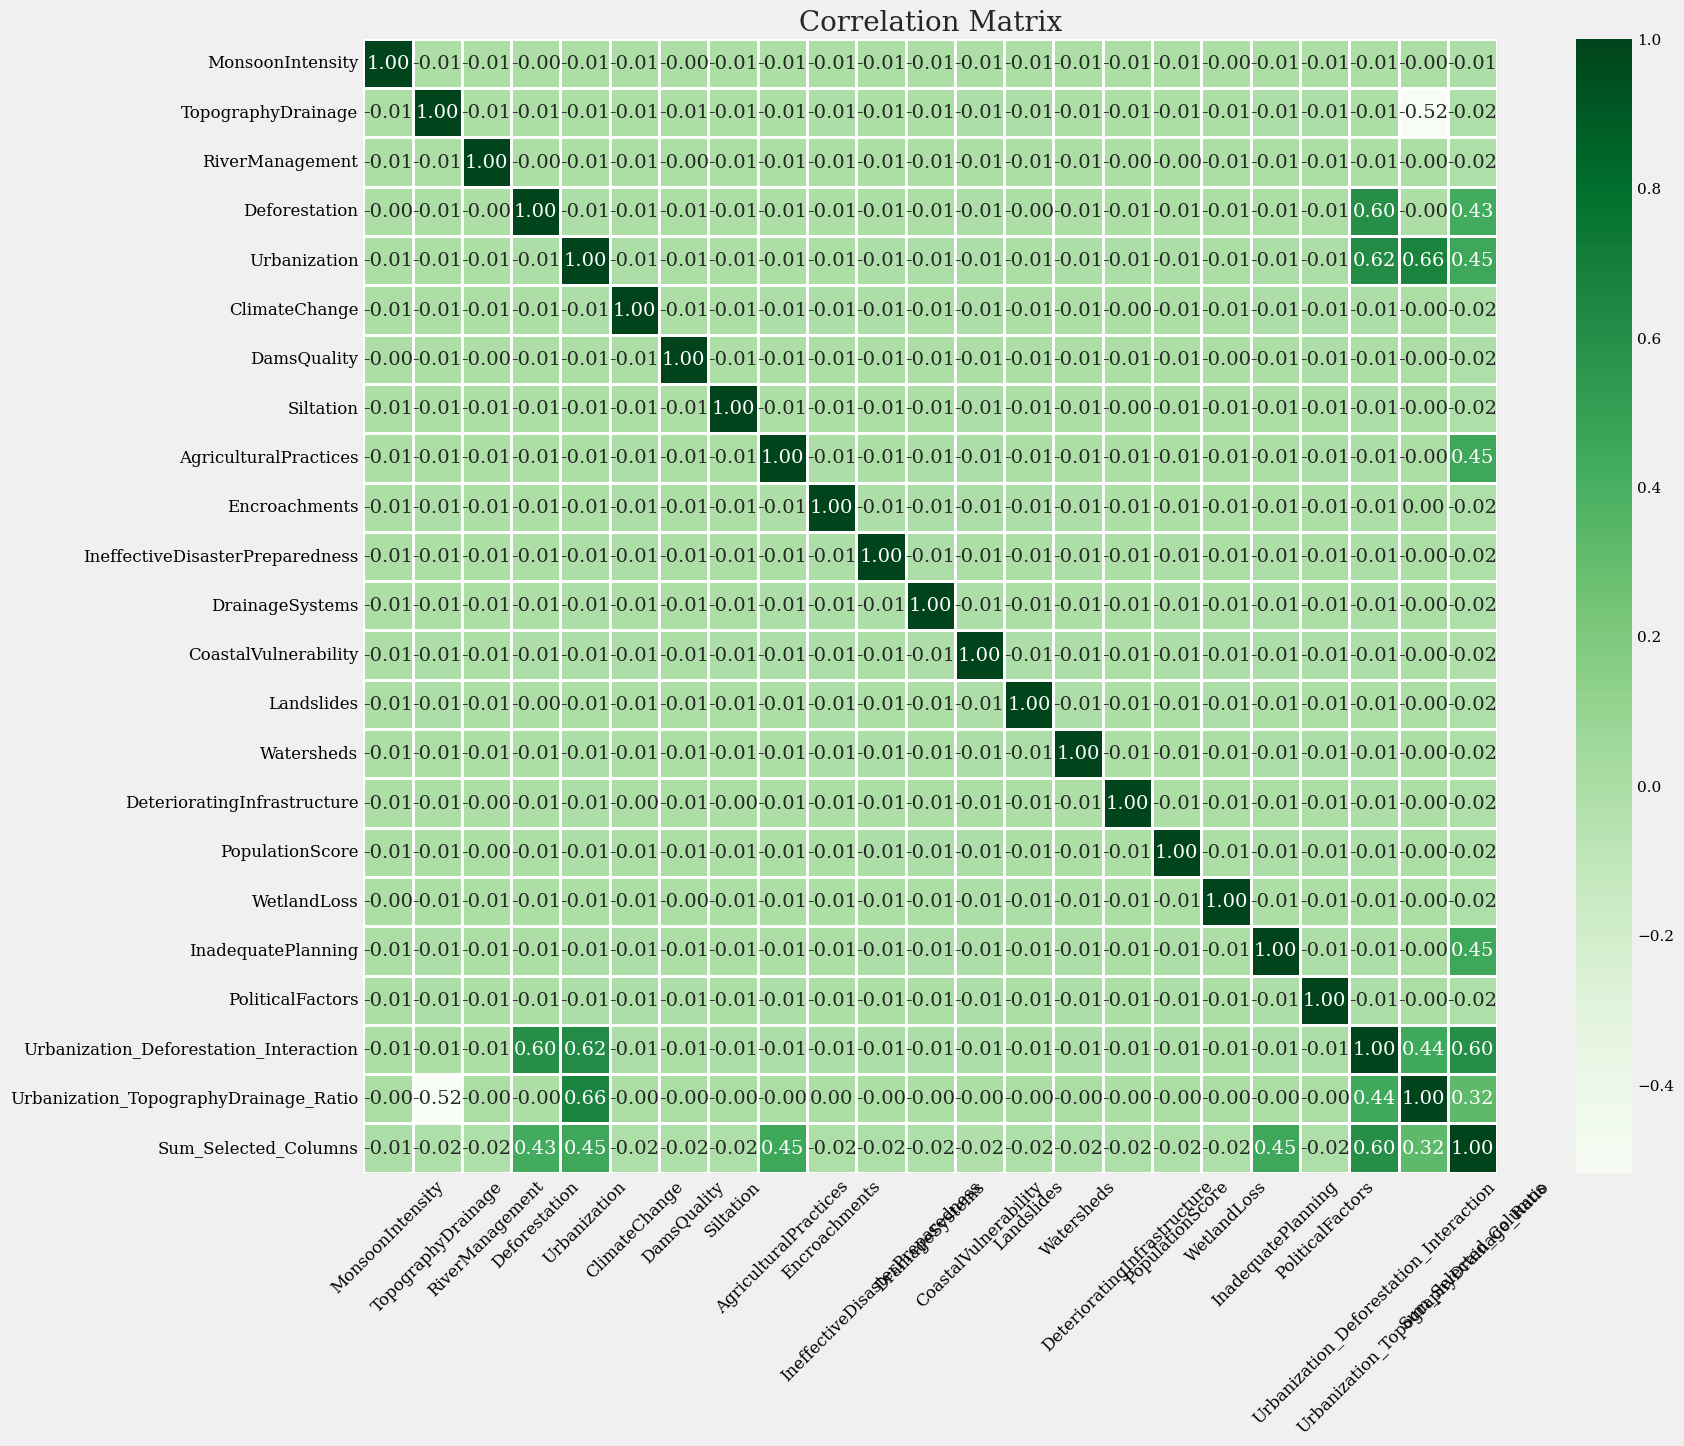

In [32]:
correlation_matrix = X.corr()

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(18, 14))  # Increase the width and height as needed

# Plot the correlation matrix as a heatmap with larger boxes
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=1, square=True)

# Customize plot
plt.title('Correlation Matrix', fontsize=20)  # Increase the font size of the title
plt.xticks(fontsize=12)  # Increase the font size of x-axis labels
plt.yticks(fontsize=12)  # Increase the font size of y-axis labels

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the aspect ratio to prevent distortion of cell shapes
heatmap.set_aspect('equal')

plt.show()

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">✨VARIANCE INFLUENCE FACTOR✨</div>

![](https://www.investopedia.com/thmb/gf0YzGsAInZdkoyB6jUGBkqLkZI=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/variance-inflation-factor.asp-Final-6cd8e4740c254821b0fa2ab057b5df88.jpg)

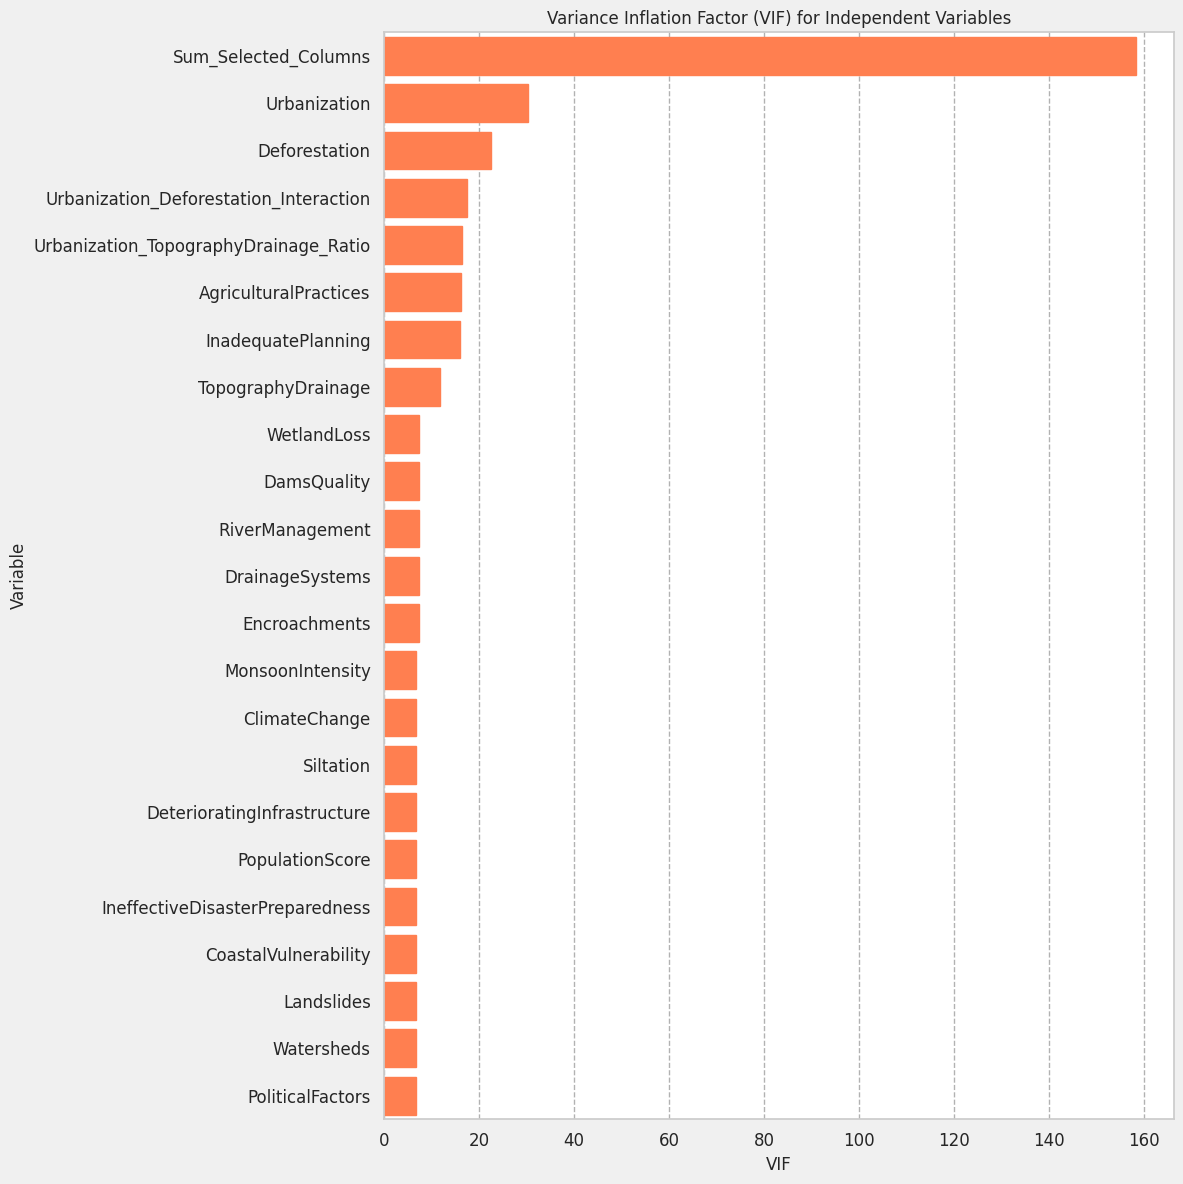

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort the dataframe by VIF values in descending order
vif_data = vif_data.sort_values(by='VIF', ascending=False)

# Set a VIF threshold (e.g., VIF > 5)
vif_threshold = 5

# Identify variables with high VIF that exceed the threshold
high_vif_variables = vif_data[vif_data["VIF"] > vif_threshold]

# Create a beautiful bar plot using Seaborn, highlighting high VIF variables
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
plot = sns.barplot(x="VIF", y="Variable", data=vif_data, palette="viridis")

# Highlight high VIF variables
for bar in plot.patches:
    if bar.get_width() > vif_threshold:
        bar.set_color('coral')

plt.xlabel('VIF')
plt.ylabel('Variable')
plt.title('Variance Inflation Factor (VIF) for Independent Variables')
plt.xticks(fontsize=12)  # Increase font size of x-axis ticks
plt.yticks(fontsize=12)  # Increase font size of y-axis ticks
plt.grid(axis='x', linestyle='--', alpha=0.6, color='gray')  # Add grid lines
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [34]:
# Display high VIF variables
print("Variables with high VIF (> {}):".format(vif_threshold))
high_vif_variables.style.background_gradient()

Variables with high VIF (> 5):


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔍🔍HYPOTHESIS TESTING🔍🔍</div>

![](https://www.analyticssteps.com/backend/media/thumbnail/6735922/4237247_1626434645_HYPOTHESIS%20TESTINGArtboard%201.jpg)

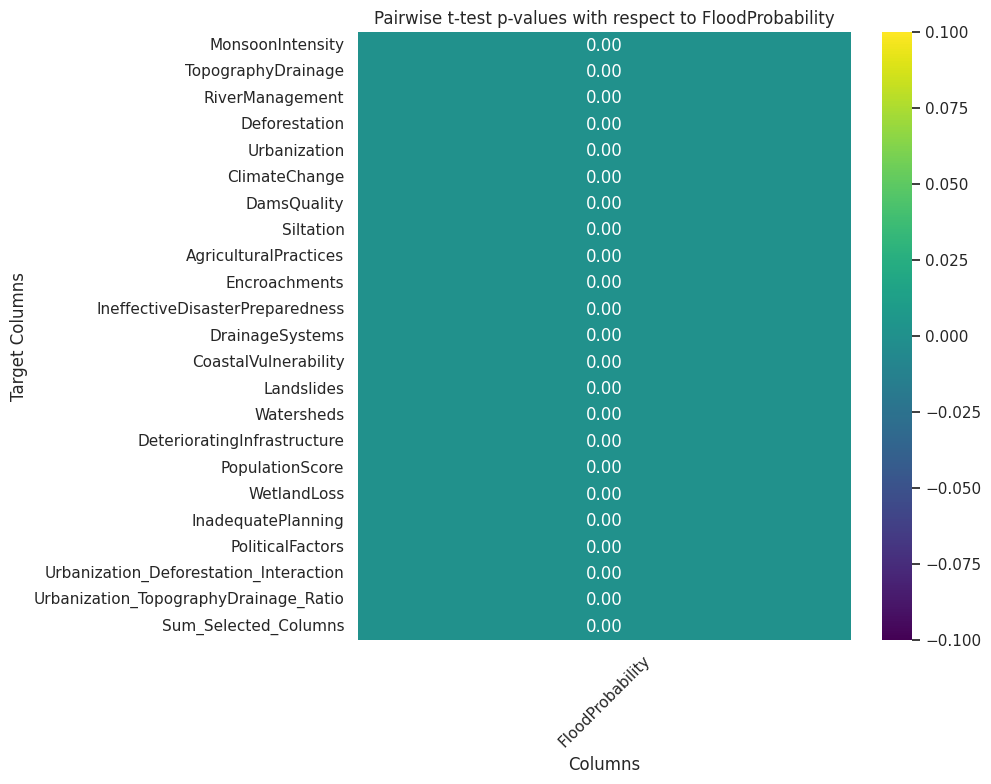

In [35]:
target_columns = ['FloodProbability']

# Perform pairwise t-tests for each target column with all other columns
p_values = {}
for target in target_columns:
    p_values[target] = {}  # Initialize a dictionary for storing p-values for this target
    for column in train_data.columns:
        if column != target:  # Exclude the target column itself
            t_stat, p_value = ttest_ind(train_data[target], train_data[column])
            p_values[target][column] = p_value

# Convert the nested dictionary to a DataFrame for better visualization
p_values_df = pd.DataFrame(p_values)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(p_values_df, cmap='viridis', annot=True, fmt=".2f")
plt.title('Pairwise t-test p-values with respect to FloodProbability')
plt.xlabel('Columns')
plt.ylabel('Target Columns')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [36]:
print("P-values for Hypothesis Testing:")
p_values_df.style.background_gradient()

P-values for Hypothesis Testing:


In [37]:
target_columns = ['FloodProbability']

# Perform pairwise t-tests for each target column with all other columns
significant_columns = {}
for target in target_columns:
    p_values = {}  # Initialize a dictionary for storing p-values for this target
    for column in train_data.columns:
        if column != target:  # Exclude the target column itself
            t_stat, p_value = ttest_ind(train_data[target], train_data[column])
            p_values[column] = p_value
    
    # Filter columns based on p-value threshold (e.g., 0.05)
    significant_columns[target] = [col for col, p_val in p_values.items() if p_val <= 0.05]

# Display the number of significant columns for each target column
for target, cols in significant_columns.items():
    print(f"Number of significant columns for '{target}': {len(cols)}")

Number of significant columns for 'FloodProbability': 23


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🎇PCA (Principle Compenent Analysis)🎇</div>

![](https://miro.medium.com/v2/resize:fit:1400/1*mgncZaKaVx9U6OCQu_m8Bg.jpeg)

DataFrame with Principal Components:


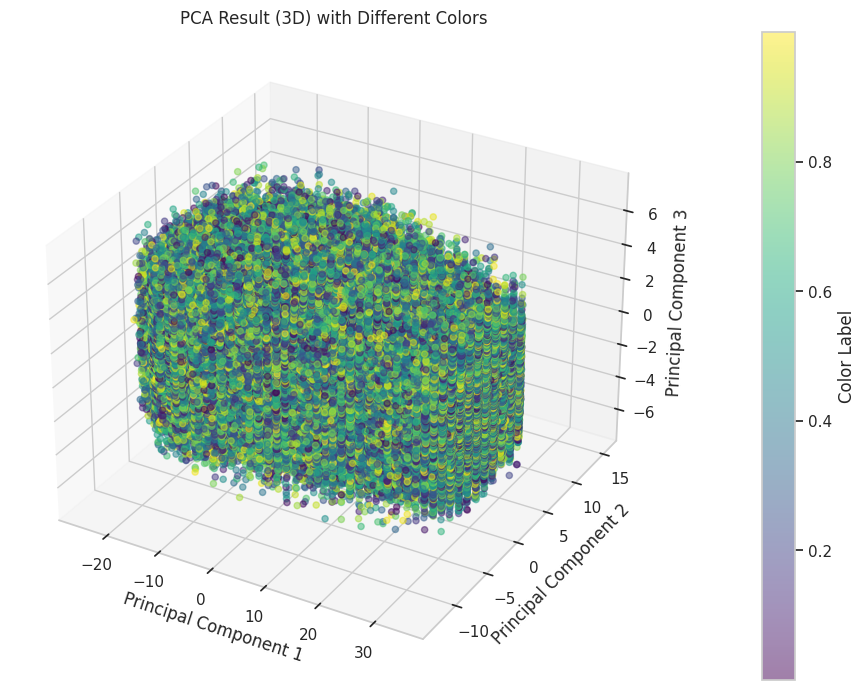

In [38]:
num_samples = len(X)
colors = np.random.rand(num_samples)
X_array = X.values

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_array)

# Set a threshold for explained variance (e.g., 95%)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
threshold = 0.80

# Find the number of components needed to exceed the threshold
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

# Create a new DataFrame with principal components as columns
pca_columns = [f'PC{i}' for i in range(1, num_components + 1)]
pca_df = pd.DataFrame(data=pca_result[:, :num_components], columns=pca_columns)

# Display the new DataFrame with principal components
print("DataFrame with Principal Components:")

# Visualize in 3D if there are at least 3 components
if num_components >= 3:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=colors, cmap='viridis', alpha=0.5)
    ax.set_title('PCA Result (3D) with Different Colors')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    colorbar = fig.colorbar(scatter, ax=ax, pad=0.1)
    colorbar.set_label('Color Label')  # Update with appropriate label

    plt.show()
else:
    print("Number of components is less than 3, unable to visualize in 3D.")
    
pca_df.sample(10).style.background_gradient()


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">Standardization</div>

![](https://dezyre.gumlet.io/images/blog/feature-scaling-in-machine-learning/Gaussian_Distribution.webp?w=376&dpr=2.6)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
X_scale = train_data.drop(columns='FloodProbability', axis=1)
y_scale = train_data['FloodProbability']

In [41]:
ss = StandardScaler()

In [42]:
X_scale_S = ss.fit_transform(X_scale)

In [43]:
X_scale_S

array([[ 0.06843957,  1.56583782,  0.07804735, ...,  2.01751726,
        -0.47866757,  1.13210843],
       [ 0.57818604,  1.06566563, -0.45946871, ...,  0.72824153,
         0.29688804,  0.08533068],
       [ 0.57818604,  0.06532127,  0.6155634 , ..., -0.15813554,
        -0.86644538, -0.69975264],
       ...,
       [ 1.08793251, -0.93502309,  2.22811156, ...,  0.08360366,
         1.46022145, -1.22314151],
       [ 1.08793251, -0.93502309, -0.99698476, ...,  0.96998073,
         0.87855474,  1.13210843],
       [-0.4413069 ,  0.06532127,  0.6155634 , ...,  1.77577806,
        -0.09088977,  1.39380287]])

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">Train-Test-Split</div>

![](https://media.licdn.com/dms/image/D4D12AQGDGMjsrzigDg/article-cover_image-shrink_600_2000/0/1674057624735?e=2147483647&v=beta&t=tVSJ36hIjz7sFWVEDRQuvBZxAtFu5JnlCiDpvIuDGI4)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scale_S, y, test_size=0.2, random_state=42)

In [46]:
print("====================================")
print("X_train shape:", X_train.shape)
print("====================================")
print("y_train shape:", y_train.shape)
print("====================================")
print("X_test shape:", X_test.shape)
print("====================================")
print("y_test shape:", y_test.shape)
print("====================================")

X_train shape: (894365, 23)
y_train shape: (894365,)
X_test shape: (223592, 23)
y_test shape: (223592,)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">✨HYPERTUNING ✨</div>

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">✨XGBoost OPTUNA || XGBoost Classifier ✨</div>

![](https://analyticsindiamag.com/wp-content/uploads/2020/11/xgboost.png)

In [47]:
"""def objective(trial, X_train, y_train, X_test, y_test):
    # Define parameters to be optimized for XGBRegressor
    param = {
        "objective": "reg:squarederror",  # Use squared error for regression
        "eval_metric": "rmse",  # Root Mean Squared Logarithmic Error for evaluation
        "verbosity": 0,
        "booster": "gbtree",
        "random_state": 42,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.05),
        "n_estimators": trial.suggest_int("n_estimators", 400, 600),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "subsample": trial.suggest_float("subsample", 0.8, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.9),
        "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),
    }

    # Create an instance of XGBRegressor with the suggested parameters
    xgb_regressor = XGBRegressor(**param)
    
    # Fit the regressor on the training data
    xgb_regressor.fit(X_train, y_train)

    # Predict on the test data
    y_pred = xgb_regressor.predict(X_test)

    # Compute R2 score
    r2 = r2_score(y_test, y_pred)
    
    return r2

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scale_S, y, test_size=0.2, random_state=42)  

# Set up the sampler for Optuna optimization
sampler = optuna.samplers.TPESampler(seed=42)  

# Create a study object for Optuna optimization
study = optuna.create_study(direction="maximize", sampler=sampler)  # Use "maximize" for R2 score

# Run the optimization process
study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=100)

# Get the best parameters after optimization
best_params = study.best_params

print('='*50)
print(best_params)"""

'def objective(trial, X_train, y_train, X_test, y_test):\n    # Define parameters to be optimized for XGBRegressor\n    param = {\n        "objective": "reg:squarederror",  # Use squared error for regression\n        "eval_metric": "rmse",  # Root Mean Squared Logarithmic Error for evaluation\n        "verbosity": 0,\n        "booster": "gbtree",\n        "random_state": 42,\n        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.05),\n        "n_estimators": trial.suggest_int("n_estimators", 400, 600),\n        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),\n        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),\n        "max_depth": trial.suggest_int("max_depth", 3, 15),\n        "subsample": trial.suggest_float("subsample", 0.8, 1.0),\n        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.9),\n        "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),\n    }\n\n    # Create an instance of XGBRegressor with th

In [48]:
best_params = {'learning_rate': 0.049769346237099124, 
               'n_estimators': 584,
               'reg_alpha': 0.678327747915515, 
               'reg_lambda': 0.6307183788894067,
               'max_depth': 14, 'subsample': 0.9433308610114127,
               'colsample_bytree': 0.3492429037129386, 
               'min_child_weight': 7.658855760564173}

In [49]:
# optimized parameters     
xgb_best_params = {
    'n_estimators': 804,
    'learning_rate': 0.07366400082037482,
    'max_depth': 5,
    'min_child_weight': 7,
    'gamma': 0.0049952867265411136, 
    'subsample': 0.5012471120723563, 
    'colsample_bytree': 0.848562748505815,
    'lambda': 1.9547551669960237, 
    'alpha': 1.5254037937212281
}

In [50]:
model = XGBRegressor(**best_params)
model.fit(X_scale_S, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3492429037129386, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.049769346237099124, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=14, max_leaves=None,
             min_child_weight=7.658855760564173, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=584,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [51]:
model_xgb = XGBRegressor(**xgb_best_params)
model_xgb.fit(X_scale_S, y)

XGBRegressor(alpha=1.5254037937212281, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.848562748505815, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.0049952867265411136,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=1.9547551669960237,
             learning_rate=0.07366400082037482, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=804, n_jobs=None, ...)

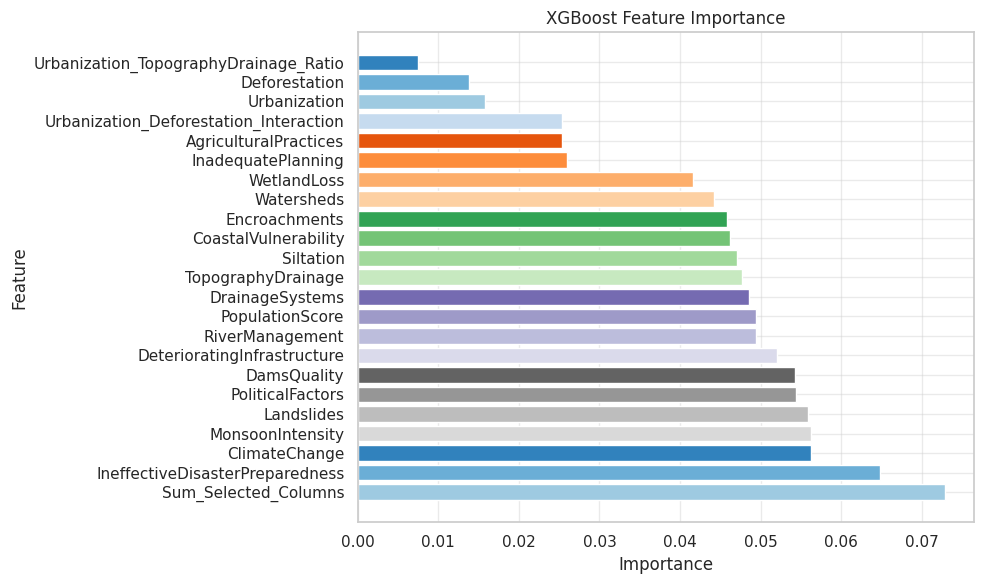

In [52]:
feature_importance = model.feature_importances_
feature_names = X.columns

sorted_indices = feature_importance.argsort()
sorted_importance = feature_importance[sorted_indices]
sorted_features = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20c.colors[:len(sorted_features)]  
plt.barh(sorted_features, sorted_importance, color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis() 
plt.tight_layout()  
plt.show()

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">✨CATBoost OPTUNA || CATBoost Classifier ✨</div>

In [53]:
"""def objective(trial, X_train, y_train, X_test, y_test):
    # Define parameters to be optimized for CatBoostRegressor
    param = {
        "objective": "RMSE",  # Use Root Mean Squared Error (RMSE) as objective for regression
        "eval_metric": "RMSE",  # Use RMSE for evaluation
        "random_state": 42,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "n_estimators": trial.suggest_int("n_estimators", 400, 600),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.8, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.3, 0.9),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),
    }

    # Create an instance of CatBoostRegressor with the suggested parameters
    catboost_regressor = CatBoostRegressor(**param, verbose=0)
    
    # Fit the regressor on the training data
    catboost_regressor.fit(X_train, y_train)

    # Predict on the test data
    y_pred = catboost_regressor.predict(X_test)

    # Compute R2 score
    r2 = r2_score(y_test, y_pred)
    
    return r2

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Set up the sampler for Optuna optimization
sampler = optuna.samplers.TPESampler(seed=42)  

# Create a study object for Optuna optimization
study = optuna.create_study(direction="maximize", sampler=sampler)  # Use "maximize" for R2 score

# Run the optimization process
study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=100)

# Get the best parameters after optimization
best_params = study.best_params

print('='*50)
print(best_params)"""

'def objective(trial, X_train, y_train, X_test, y_test):\n    # Define parameters to be optimized for CatBoostRegressor\n    param = {\n        "objective": "RMSE",  # Use Root Mean Squared Error (RMSE) as objective for regression\n        "eval_metric": "RMSE",  # Use RMSE for evaluation\n        "random_state": 42,\n        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),\n        "n_estimators": trial.suggest_int("n_estimators", 400, 600),\n        "max_depth": trial.suggest_int("max_depth", 3, 10),\n        "subsample": trial.suggest_float("subsample", 0.8, 1.0),\n        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.3, 0.9),\n        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),\n    }\n\n    # Create an instance of CatBoostRegressor with the suggested parameters\n    catboost_regressor = CatBoostRegressor(**param, verbose=0)\n    \n    # Fit the regressor on the training data\n    catboost_regressor.fit(X_train, y_train)\n\n    # Pr

In [54]:
#best_params_cat = {}

In [55]:
#model_cat = CatBoostRegressor(**best_params_cat)
model_cat = CatBoostRegressor()
model_cat.fit(X_scale_S, y)

Learning rate set to 0.124117
0:	learn: 0.0486020	total: 249ms	remaining: 4m 8s
1:	learn: 0.0475129	total: 419ms	remaining: 3m 28s
2:	learn: 0.0465102	total: 596ms	remaining: 3m 18s
3:	learn: 0.0456556	total: 753ms	remaining: 3m 7s
4:	learn: 0.0448519	total: 920ms	remaining: 3m 3s
5:	learn: 0.0440817	total: 1.08s	remaining: 2m 59s
6:	learn: 0.0433878	total: 1.25s	remaining: 2m 56s
7:	learn: 0.0427639	total: 1.39s	remaining: 2m 52s
8:	learn: 0.0421571	total: 1.54s	remaining: 2m 49s
9:	learn: 0.0416015	total: 1.68s	remaining: 2m 46s
10:	learn: 0.0410576	total: 1.82s	remaining: 2m 43s
11:	learn: 0.0405302	total: 1.96s	remaining: 2m 41s
12:	learn: 0.0400497	total: 2.11s	remaining: 2m 40s
13:	learn: 0.0395807	total: 2.27s	remaining: 2m 39s
14:	learn: 0.0391375	total: 2.43s	remaining: 2m 39s
15:	learn: 0.0387088	total: 2.6s	remaining: 2m 39s
16:	learn: 0.0382963	total: 2.74s	remaining: 2m 38s
17:	learn: 0.0379007	total: 2.88s	remaining: 2m 37s
18:	learn: 0.0375404	total: 3.02s	remaining: 2m 

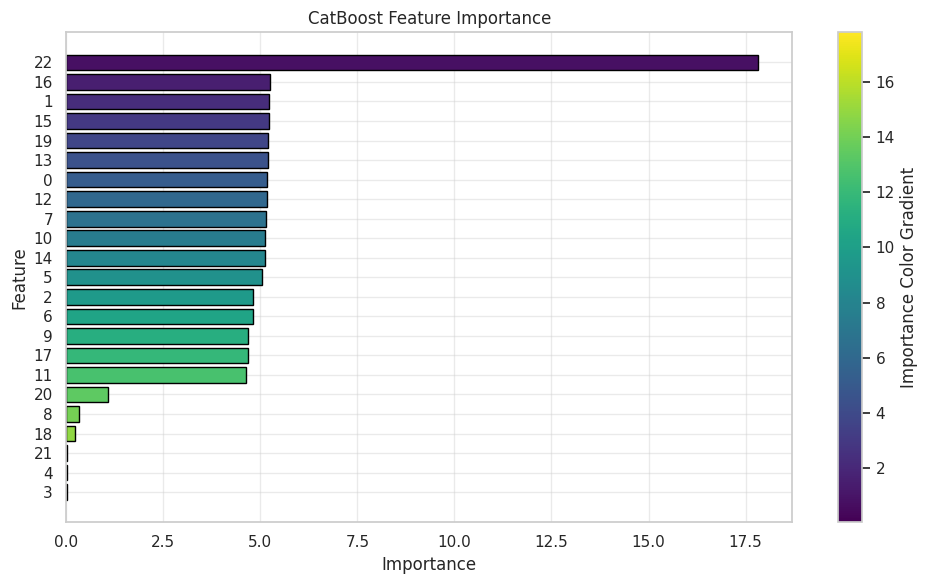

In [56]:
pool = Pool(X_scale_S, y)

# Get feature importance
feature_importance = model_cat.get_feature_importance(pool, type='PredictionValuesChange', prettified=True)

# Sort feature importance values
feature_importance_sorted = feature_importance.sort_values(by='Importances', ascending=False)

# Generate a color gradient for the bars
colors = sns.color_palette("viridis", len(feature_importance_sorted))

# Plot feature importance with customized colors and black border for bars
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_sorted['Feature Id'], feature_importance_sorted['Importances'], color=colors, edgecolor='black')  # Add edgecolor='black' for black borders
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.tight_layout()  # Adjust layout to prevent cropping

# Add color bar legend
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array(feature_importance_sorted['Importances'])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Importance Color Gradient')

plt.show()

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">✨LGBM OPTUNA || LGBM Classifier ✨</div>

![](https://datadriven-rnd.com/wp-content/uploads/2021/10/%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%B3%E3%82%B7%E3%83%A7%E3%83%83%E3%83%88-2021-10-04-21.47.12.png)

In [57]:
"""def objective(trial):
    # Define parameters to be optimized for LightGBM
    params = {
        "objective": "regression",
        "metric": "mse",  # Use Mean Squared Error (MSE) for evaluation
        "verbosity": -1,
        "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart", "goss"]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "num_leaves": trial.suggest_int("num_leaves", 10, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_child_samples": trial.suggest_int("min_child_samples", 1, 20),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "random_state": 42,
    }

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_scale_S, y, test_size=0.2, random_state=42)

    # Create a LightGBM Dataset for training and validation
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)

    # Train the LightGBM model
    model = lgb.train(params, train_data, valid_sets=[train_data, val_data])

    # Make predictions on the validation set
    y_pred = model.predict(X_val, num_iteration=model.best_iteration)

    # Calculate R2 score as the evaluation metric
    r2 = r2_score(y_val, y_pred)

    return r2

# Set up the Optuna study
study = optuna.create_study(direction="maximize")  # Use "maximize" for R2 score

# Run the optimization process
study.optimize(objective, n_trials=100)

# Get the best parameters after optimization
best_params = study.best_params

print('='*50)
print(best_params)"""

'def objective(trial):\n    # Define parameters to be optimized for LightGBM\n    params = {\n        "objective": "regression",\n        "metric": "mse",  # Use Mean Squared Error (MSE) for evaluation\n        "verbosity": -1,\n        "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart", "goss"]),\n        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),\n        "num_leaves": trial.suggest_int("num_leaves", 10, 1000),\n        "max_depth": trial.suggest_int("max_depth", 3, 15),\n        "min_child_samples": trial.suggest_int("min_child_samples", 1, 20),\n        "subsample": trial.suggest_float("subsample", 0.5, 1.0),\n        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),\n        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),\n        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),\n        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),\n        "random_state": 42,\n    }\n\n    # S

In [58]:
#print('Best Parameters:', study.best_params)
best_params_lgbm = {
    'n_estimators': 939,
    'learning_rate': 0.2686031022851845,
    'max_depth': 3, 
    'min_child_samples': 55, 
    'num_leaves': 68,
    'subsample': 0.698948956171567,
    'colsample_bytree': 0.5834834747393846, 
    'reg_lambda': 1.0666821210651256,
    'reg_alpha': 1.9332040363807412
}

In [59]:
import warnings
# Filter out LightGBM warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [60]:
model_lgbm = LGBMRegressor(**best_params_lgbm)
model_lgbm.fit(X_scale_S,y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.212801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 1117957, number of used features: 23
[LightGBM] [Info] Start training from score 0.504348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor(colsample_bytree=0.5834834747393846,
              learning_rate=0.2686031022851845, max_depth=3,
              min_child_samples=55, n_estimators=939, num_leaves=68,
              reg_alpha=1.9332040363807412, reg_lambda=1.0666821210651256,
              subsample=0.698948956171567)

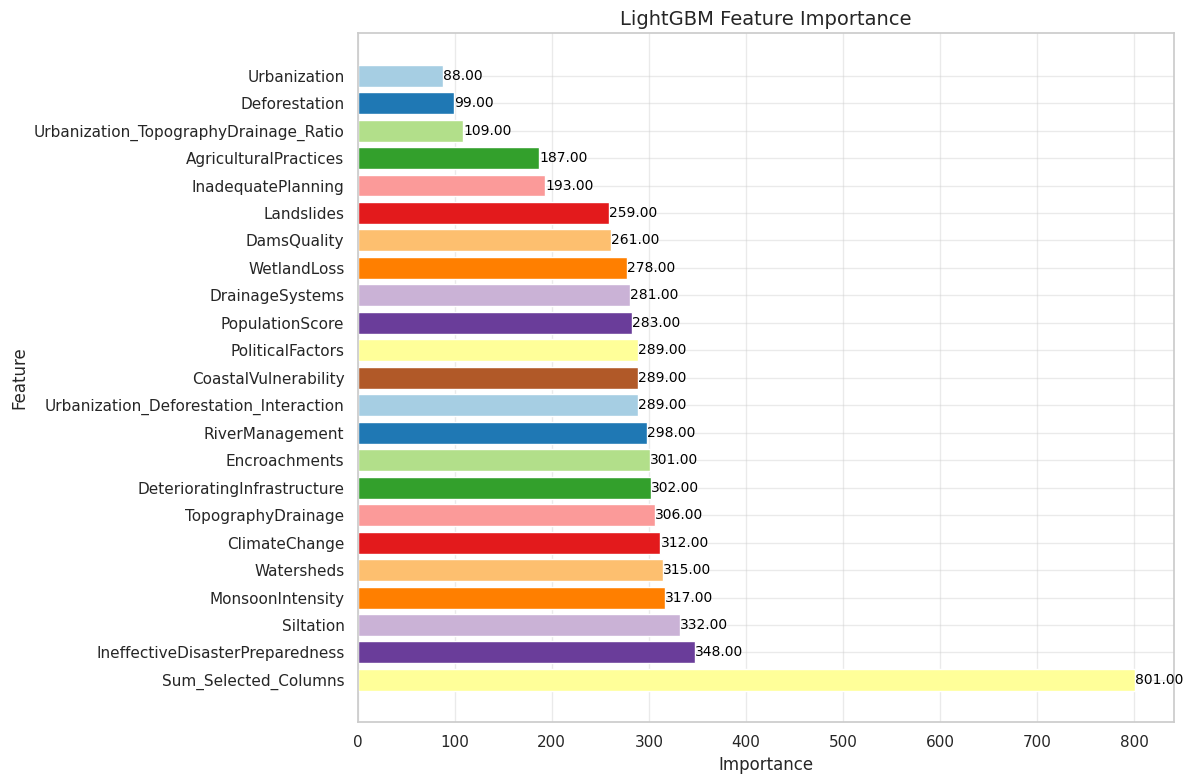

In [61]:
feature_importance = model_lgbm.feature_importances_

feature_names = X.columns

sorted_indices = feature_importance.argsort()
sorted_importance = feature_importance[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Plot feature importance
plt.figure(figsize=(12, 8))
colors = plt.cm.Paired.colors[:len(sorted_features)]  
plt.barh(sorted_features, sorted_importance, color=colors)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('LightGBM Feature Importance', fontsize=14)
plt.gca().invert_yaxis() 

for i, v in enumerate(sorted_importance):
    plt.text(v + 0.02, i, f'{v:.2f}', color='black', va='center', fontsize=10)

plt.tight_layout()  
plt.show()

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 Prediction 🔥</div>

In [62]:
test_pred = test_data.drop(columns='id',axis = 1)

In [63]:
predictions_xg = model.predict(test_pred)

In [64]:
predictions_xg

array([0.6317006 , 0.63080984, 0.6325366 , ..., 0.6299024 , 0.6225518 ,
       0.6277488 ], dtype=float32)

In [65]:
predictions_xg2 = model_xgb.predict(test_pred)

In [66]:
predictions_xg2

array([0.79167426, 0.78174067, 0.77721393, ..., 0.79167426, 0.78480655,
       0.7880731 ], dtype=float32)

In [67]:
prediction_catboost = model_cat.predict(test_pred)

In [68]:
prediction_catboost

array([0.1335797 , 0.18516093, 0.22033867, ..., 0.12658163, 0.14948857,
       0.14059057])

In [69]:
prediction_lgbm = model_lgbm.predict(test_pred)

In [70]:
prediction_lgbm

array([0.78247873, 0.77631762, 0.77593066, ..., 0.78239745, 0.77922962,
       0.77887314])

In [71]:
submitted_xgboost = pd.read_csv("/kaggle/input/xgboostsubmission2/XGBoost_Submission2.csv")

In [72]:
submitted_xgboost['FloodProbability'].head(3)

0    0.577765
1    0.454610
2    0.449497
Name: FloodProbability, dtype: float64

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">⚡Prediction CSV File Submission⚡</div>

In [73]:
sample_submission = pd.read_csv("/kaggle/input/playground-series-s4e5/sample_submission.csv")

In [74]:
sample_submission['FloodProbability'] = predictions_xg

In [75]:
sample_submission.to_csv("XGBoost_Submission.csv",index=False)

In [76]:
sample_submission['FloodProbability'] = submitted_xgboost['FloodProbability']

In [77]:
sample_submission.to_csv("XGBoost_Submission2.csv",index=False)

In [78]:
sample_submission['FloodProbability'] = prediction_catboost

In [79]:
sample_submission.to_csv("CatBoost_Submission.csv",index=False)

In [80]:
sample_submission['FloodProbability'] = prediction_lgbm

In [81]:
sample_submission.to_csv("LGMB_Submission.csv",index=False)